# ---------------------------------- Global Power Plant Database ----------------------------------

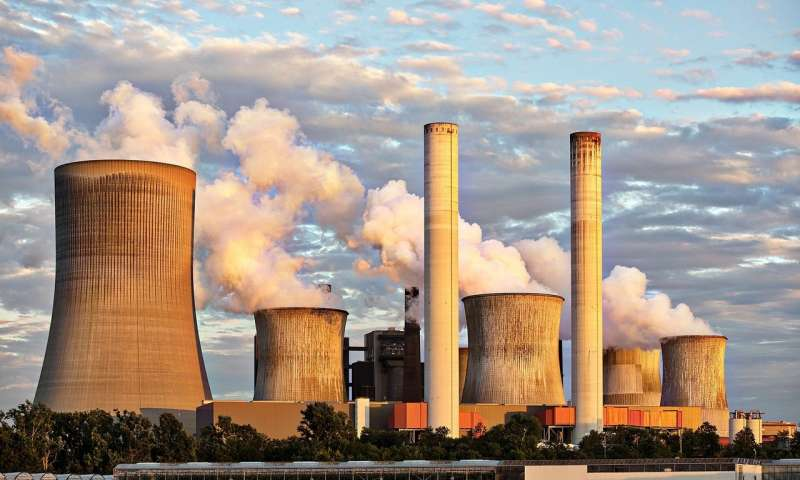

## Problem Statement:
- Description
​
The Global Power Plant Database is a comprehensive, open source database of power plants around the world. It centralizes power plant data to make it easier to navigate, compare and draw insights for one’s own analysis. The database covers approximately 35,000 power plants from 167 countries and includes thermal plants (e.g. coal, gas, oil, nuclear, biomass, waste, geothermal) and renewables (e.g. hydro, wind, solar). Each power plant is geolocated and entries contain information on plant capacity, generation, ownership, and fuel type. It will be continuously updated as data becomes available.
​
Key attributes of the database
​
The database includes the following indicators:
​
- country (text): 3 character country code corresponding to the ISO 3166-1 alpha-3 specification [5]
- country_long (text): longer form of the country designation
- name (text): name or title of the power plant, generally in Romanized form
- gppd_idnr (text): 10 or 12 character identifier for the power plant
- capacity_mw (number): electrical generating capacity in megawatts
- latitude (number): geolocation in decimal degrees; WGS84 (EPSG:4326)
- longitude (number): geolocation in decimal degrees; WGS84 (EPSG:4326)
- primary_fuel (text): energy source used in primary electricity generation or export
- other_fuel1 (text): energy source used in electricity generation or export
- other_fuel2 (text): energy source used in electricity generation or export
- other_fuel3 (text): energy source used in electricity generation or export
- commissioning_year (number): year of plant operation, weighted by unit-capacity when data is available
- owner (text): majority shareholder of the power plant, generally in Romanized form
- source (text): entity reporting the data; could be an organization, report, or document, generally in Romanized form
- url (text): web document corresponding to the source field
- geolocation_source (text): attribution for geolocation information
- wepp_id (text): a reference to a unique plant identifier in the widely-used PLATTS-WEPP database.
- year_of_capacity_data (number): year the capacity information was reported
- generation_data_source (text): attribution for the reported generation information
- generation_gwh_2013 (number): electricity generation in gigawatt-hours reported for the year 2013
- generation_gwh_2014 (number): electricity generation in gigawatt-hours reported for the year 2014
- generation_gwh_2015 (number): electricity generation in gigawatt-hours reported for the year 2015
- generation_gwh_2016 (number): electricity generation in gigawatt-hours reported for the year 2016
- generation_gwh_2017 (number): electricity generation in gigawatt-hours reported for the year 2017
- generation_gwh_2018 (number): electricity generation in gigawatt-hours reported for the year 2018
- generation_gwh_2019 (number): electricity generation in gigawatt-hours reported for the year 2019
- estimated_generation_gwh_2013 (number): estimated electricity generation in gigawatt-hours for the year 2013
- estimated_generation_gwh_2014 (number): estimated electricity generation in gigawatt-hours for the year 2014
- estimated_generation_gwh_2015 (number): estimated electricity generation in gigawatt-hours for the year 2015
- estimated_generation_gwh_2016 (number): estimated electricity generation in gigawatt-hours for the year 2016
- estimated_generation_gwh_2017 (number): estimated electricity generation in gigawatt-hours for the year 2017
- estimated_generation_note_2013 (text): label of the model/method used to estimate generation for the year 2013
- estimated_generation_note_2014 (text): label of the model/method used to estimate generation for the year 2014
- estimated_generation_note_2015 (text): label of the model/method used to estimate generation for the year 2015
- estimated_generation_note_2016 (text): label of the model/method used to estimate generation for the year 2016
- estimated_generation_note_2017 (text): label of the model/method used to estimate generation for the year 2017
- Fuel Type Aggregation
​
We define the "Fuel Type" attribute of our database based on common fuel categories.
​
- Prediction:
​
Make two prediction for labels
​
- 1.primary_fuel
- 2.capacity_mw

In [36]:
# To Read and Process Data
import pandas as pd
import numpy as np


# For data Visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Getting over warning messages
import warnings
warnings.filterwarnings('ignore')

# For Encoding Categorical Data
from sklearn.preprocessing import LabelEncoder

# for scaling
from sklearn.preprocessing import StandardScaler  

pd.pandas.set_option('display.max_columns',None)  # To display, all columns
pd.pandas.set_option('display.max_rows',None)  # To display, all columns
# For handling outliers
# importing required libraries
from scipy import stats
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import zscore
# For machine learning and finding 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [2]:
df = pd.read_csv('database_IND.csv')

In [54]:
df

capacity_mw  latitude  longitude primary_fuel   other_fuel1  \
0         2.5000   28.1839    73.2407        Solar           NaN   
1        98.0000   24.7663    74.6090         Coal           NaN   
2        39.2000   21.9038    69.3732         Wind           NaN   
3       135.0000   23.8712    91.3602          Gas           NaN   
4       938.0375   21.9603    82.4091         Coal           Oil   
5       250.0000   23.7689    68.6447         Coal           Oil   
6        60.0000   10.4547    77.0078        Hydro           NaN   
7       192.0000   32.2258    77.2070        Hydro           NaN   
8       290.0000   16.3300    75.8863        Hydro           NaN   
9       210.0000   23.1642    81.6373         Coal           Oil   
10      938.0375   21.0782    77.9009         Coal           Oil   
11      134.0000   31.2717    76.4938        Hydro           NaN   
12      938.0375   24.2007    82.8000         Coal           Oil   
13       16.9500   31.2412    77.8769        Hydro           NaN   
14        9.0000       NaN        NaN        Hydro           NaN   
15      938.0375   24.2010    82.7891         Coal           Oil   
16      419.3300   25.1797    76.3188          Gas           NaN   
17      600.0000   23.0666    81.7841         Coal           NaN   
18      938.0375   23.0655    81.7865         Coal           Oil   
19       10.0000   18.0845    76.1851      Biomass           NaN   
20       17.0000   19.5867    74.7061      Biomass           NaN   
21       24.0000   16.7708    74.9191      Biomass           NaN   
22      652.0000   26.6282    79.5286          Gas           NaN   
23      600.0000   21.7438    83.2741         Coal           Oil   
24       46.0000   19.7881    79.1518         Coal           NaN   
25       50.0000       NaN        NaN        Solar           NaN   
26        1.0000   28.3615    74.2402        Solar           NaN   
27       16.5000   14.5751    76.3926         Wind           NaN   
28       50.0000   14.9455    77.6870        Solar           NaN   
29      113.6000   18.8580    73.6396         Wind           NaN   
30       19.8000   10.7245    77.1893         Wind           NaN   
31       13.2000   14.4791    76.3482         Wind           NaN   
32        5.0000   27.3473    71.6917        Solar           NaN   
33        5.0000   27.3600    71.6918        Solar           NaN   
34        5.0000   27.3632    71.6918        Solar           NaN   
35        5.0000   27.3661    71.6916        Solar           NaN   
36        5.0000   27.3537    71.6917        Solar           NaN   
37        5.0000   27.3504    71.6918        Solar           NaN   
38        5.0000   27.3566    71.6917        Solar           NaN   
39      705.0000   28.5060    77.3066         Coal           Oil   
40       28.0000   16.2804    75.2250      Biomass           NaN   
41      450.0000   33.1815    75.3155        Hydro           NaN   
42      450.0000       NaN        NaN        Hydro           NaN   
43      180.0000   32.8063    76.1418        Hydro           NaN   
44      938.0375   23.8285    87.4513         Coal           Oil   
45      600.0000       NaN        NaN         Coal           Oil   
46      510.0000   18.1396    82.1221        Hydro           NaN   
47       67.5000   19.8601    79.3421         Coal           NaN   
48       10.0000   24.6929    74.6890         Coal           NaN   
49      300.0000   22.3421    82.4305         Coal           Oil   
50      335.0000   22.9956    88.4042         Coal           Oil   
51       12.0000   32.1686    76.4695        Hydro           NaN   
52      315.0000   24.1917    81.2875        Hydro           NaN   
53       30.0000   24.1917    81.2875        Hydro           NaN   
54       60.0000   24.1917    81.2875        Hydro           NaN   
55       20.0000   24.2230    81.2747        Hydro           NaN   
56       20.0000   23.6026    74.2562         Coal           NaN   
57      938.0375   21.9114    83.1889         Coal           

In [55]:
df.head()

capacity_mw  latitude  longitude primary_fuel other_fuel1  \
0       2.5000   28.1839    73.2407        Solar         NaN   
1      98.0000   24.7663    74.6090         Coal         NaN   
2      39.2000   21.9038    69.3732         Wind         NaN   
3     135.0000   23.8712    91.3602          Gas         NaN   
4     938.0375   21.9603    82.4091         Coal         Oil   

   commissioning_year                    geolocation_source  \
0              2011.0  National Renewable Energy Laboratory   
1                 NaN                                   WRI   
2                 NaN                                   WRI   
3              2004.0                                   WRI   
4              2015.0                                   WRI   

   year_of_capacity_data  generation_gwh_2014  generation_gwh_2015  \
0                    NaN                  NaN                  NaN   
1                    NaN                  NaN                  NaN   
2                    NaN                  NaN                  NaN   
3                 2019.0           617.789264              843.747   
4                 2019.0          3035.550000             5916.370   

   generation_gwh_2016  generation_gwh_2017  generation_gwh_2018  
0                  NaN                  NaN                  NaN  
1                  NaN                  NaN                  NaN  
2                  NaN                  NaN                  NaN  
3           886.004428           663.774500           626.239128  
4          6243.000000          5385.579736          7279.000000

# Getting to Know Data

In [71]:
df.head()

capacity_mw  latitude  longitude primary_fuel other_fuel1  \
0       2.5000   28.1839    73.2407        Solar         NaN   
1      98.0000   24.7663    74.6090         Coal         NaN   
2      39.2000   21.9038    69.3732         Wind         NaN   
3     135.0000   23.8712    91.3602          Gas         NaN   
4     938.0375   21.9603    82.4091         Coal         Oil   

   commissioning_year                    geolocation_source  \
0              2011.0  National Renewable Energy Laboratory   
1                 NaN                                   WRI   
2                 NaN                                   WRI   
3              2004.0                                   WRI   
4              2015.0                                   WRI   

   year_of_capacity_data  generation_gwh_2014  generation_gwh_2015  \
0                    NaN                  NaN                  NaN   
1                    NaN                  NaN                  NaN   
2                    NaN                  NaN                  NaN   
3                 2019.0           617.789264              843.747   
4                 2019.0          3035.550000             5916.370   

   generation_gwh_2016  generation_gwh_2017  generation_gwh_2018  
0                  NaN                  NaN                  NaN  
1                  NaN                  NaN                  NaN  
2                  NaN                  NaN                  NaN  
3           886.004428           663.774500           626.239128  
4          6243.000000          5385.579736          7279.000000

In [72]:
df.tail()

capacity_mw  latitude  longitude primary_fuel other_fuel1  \
902     938.0375   16.2949    77.3568         Coal         Oil   
903       3.0000   12.8932    78.1654        Solar         NaN   
904      25.5000   15.2758    75.5811         Wind         NaN   
905      80.0000   24.3500    73.7477         Coal         NaN   
906      16.5000    9.9344    77.4768         Wind         NaN   

     commissioning_year geolocation_source  year_of_capacity_data  \
902              2016.0                WRI                 2019.0   
903                 NaN     Industry About                    NaN   
904                 NaN                WRI                    NaN   
905                 NaN                WRI                    NaN   
906                 NaN                WRI                    NaN   

     generation_gwh_2014  generation_gwh_2015  generation_gwh_2016  \
902                  NaN             0.994875            233.59665   
903                  NaN                  NaN                  NaN   
904                  NaN                  NaN                  NaN   
905                  NaN                  NaN                  NaN   
906                  NaN                  NaN                  NaN   

     generation_gwh_2017  generation_gwh_2018  
902                865.4                686.5  
903                  NaN                  NaN  
904                  NaN                  NaN  
905                  NaN                  NaN  
906                  NaN                  NaN

In [73]:
df.sample(5)

capacity_mw  latitude  longitude primary_fuel other_fuel1  \
283          1.0   22.4809    72.5235        Solar         NaN   
163         25.0   15.1707    76.3770         Coal         NaN   
360        200.0   25.5177    92.6679        Hydro         NaN   
77          41.0   13.8274    75.7131         Coal         NaN   
348        120.0   14.9550    74.5904        Hydro         NaN   

     commissioning_year geolocation_source  year_of_capacity_data  \
283                 NaN     Industry About                    NaN   
163                 NaN                WRI                    NaN   
360              1993.0                WRI                 2019.0   
77                  NaN                WRI                    NaN   
348              1998.0                WRI                 2019.0   

     generation_gwh_2014  generation_gwh_2015  generation_gwh_2016  \
283                  NaN                  NaN                  NaN   
163                  NaN                  NaN                  NaN   
360             626.3127             777.8910           1082.82865   
77                   NaN                  NaN                  NaN   
348             383.8312             202.2437            153.38920   

     generation_gwh_2017  generation_gwh_2018  
283                  NaN                  NaN  
163                  NaN                  NaN  
360           1166.96585            1112.2309  
77                   NaN                  NaN  
348            170.08530             343.8322

In [74]:
df.shape

(907, 13)

# Getting to Overview of Data Types Data

In [75]:
numerical_data = [feature for feature in df.columns if df[feature].dtype != 'O']
print('Total Numerical Features are = ',len(numerical_data))

Total Numerical Features are =  10


In [76]:
categorical_data = [feature for feature in df.columns if df[feature].dtype == 'O']
print('Total Categorical Features are = ',len(categorical_data))

Total Categorical Features are =  3


# Handling Duplicate Values

In [77]:
df.shape

(907, 13)

In [78]:
df.drop_duplicates(inplace=True)

In [79]:
df.shape

(906, 13)

# Conclusion
- There are no duplicates in our data set, as there are 891 unique names

# Exploring five number summery for Numerical Data

In [80]:
df.describe().T

count         mean          std        min  \
capacity_mw            906.0   240.223955   326.730310     0.0000   
latitude               861.0    21.197918     6.239612     8.1689   
longitude              861.0    77.464907     4.939316    68.6447   
commissioning_year     527.0  1997.091082    17.082868  1927.0000   
year_of_capacity_data  519.0  2019.000000     0.000000  2019.0000   
generation_gwh_2014    398.0  1954.050199  2335.170089     0.0000   
generation_gwh_2015    422.0  1946.278464  2363.744865     0.0000   
generation_gwh_2016    434.0  2018.329679  2461.184325     0.0000   
generation_gwh_2017    440.0  2106.271610  2531.772645     0.0000   
generation_gwh_2018    448.0  2101.351259  2522.735602     0.0000   

                               25%          50%          75%          max  
capacity_mw              16.612500    59.600000   386.625000   938.037500  
latitude                 16.773900    21.780000    25.512400    34.649000  
longitude                74.256200    76.719500    79.440800    95.408000  
commissioning_year     1988.000000  2001.000000  2012.000000  2018.000000  
year_of_capacity_data  2019.000000  2019.000000  2019.000000  2019.000000  
generation_gwh_2014     223.557672   801.123775  3035.306250  7252.929118  
generation_gwh_2015     176.381063   711.181225  3084.121250  7445.731531  
generation_gwh_2016     188.285252   737.205450  3282.861313  7924.725403  
generation_gwh_2017     177.874930   817.977250  3275.690475  7922.413793  
generation_gwh_2018     193.378250   751.644375  3143.535900  7568.772375

## Observation:
- capacity_mw: Avergae electrical generating capacity in for the powwerplant is around 163.355148.

- latitude:Latitude numbers (coordinates) used to describe a position on the plane of a geographic coordinate systemGeolocation is the identification of the geographic location of a powerplant	34936.0	32.816637	22.638603	-77.8470	29.256475	39.727750	46.263125	71.2920
- longitude:longitude numbers (coordinates) used to describe a position on the plane of a geographic coordinate system Latitude numbers (coordinates) used to describe a position on the plane of a geographic coordinate system. 	34936.0	-6.972803	78.405850	-179.9777	-77.641550	-2.127100	49.502675	179.3887
- commissioning_year: The minimum of plant operation weighted by unit-capacity is 1896.0000 and maximum is 2020.0000
- year_of_capacity_data:The capacity information was reported	
- generation_gwh_2013:The minimum and maximum electricity generation in gigawatt-hours reported for the year 2013 is -947.6000	and 50834.0000
- generation_gwh_2014:The minimum and maximum electricity generation in gigawatt-hours reported for the year 2014 is -989.6190	and 32320.9170
- generation_gwh_2015:	The minimum and maximum electricity generation in gigawatt-hours reported for the year 2015 is-864.4280	and 37433.6070
- generation_gwh_2016:	The minimum and maximum electricity generation in gigawatt-hours reported for the year 2016 is-768.6200	and 32377.4770
- generation_gwh_2017:	The minimum and maximum electricity generation in gigawatt-hours reported for the year 2017 is-934.9440	and 36448.6430
- generation_gwh_2018:	The minimum and maximum electricity generation in gigawatt-hours reported for the year 2018 is -982.6220 and 35136.0000
- generation_gwh_2019:	The minimum and maximum electricity generation in gigawatt-hours reported for the year 2019 is -780.3390 and 31920.3680
 Hydro power plant generates electricity from turbine-driven generators that transform the potential energy of falling or fast-flowing water into mechanical energy.The Bath County is a pumped storage power plant. Plants require electrical energy to pump uphill water, there are net negative electricity generation balances for this pumped storage hydro plants.
- estimated_generatin_gwh_2013:	The minimum and maximum estimated electricity generation in gigawatt-hours for the year 2013 is 1.1200 and 	48675.0600
- estimated_generation_gwh_2014: The minimum and maximum estimated electricity generation in gigawatt-hours for the year 2014 is 0.8700 and	58470.7700
- estimated_generation_gwh_2015:The minimum and maximum estimated electricity generation in gigawatt-hours for the year 2015 is 0.4400 and 57113.3500
- estimated_generation_gwh_2016:The minimum and maximum estimated electricity generation in gigawatt-hours for the year 2016 is 0.3000 and 60859.7300
- estimated_generation_gwh_2017:The maximum estimated electricity generation in gigawatt-hours for the year 2017 is	82810.7700

In [81]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [82]:
df.columns

Index(['capacity_mw', 'latitude', 'longitude', 'primary_fuel', 'other_fuel1',
       'commissioning_year', 'geolocation_source', 'year_of_capacity_data',
       'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016',
       'generation_gwh_2017', 'generation_gwh_2018'],
      dtype='object')

# Exploring Categorical Data

In [83]:
# Checking total number of missing values
df.isnull().sum().sum()

3970

In [84]:
df.size

11778

In [85]:
# Checking feature wise missing values from dataset
df.isnull().sum()

capacity_mw                0
latitude                  45
longitude                 45
primary_fuel               0
other_fuel1              708
commissioning_year       379
geolocation_source        18
year_of_capacity_data    387
generation_gwh_2014      508
generation_gwh_2015      484
generation_gwh_2016      472
generation_gwh_2017      466
generation_gwh_2018      458
dtype: int64

We have missing values present in our dataset columns that will need to be treated now. But before that we will separate our categorical columns and numerical columns so that application of meand and mode will become easier

In [86]:
plt.figure(figsize=(15,10))
#sns.heatmap(df.isnull(),annot=True)

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

In [87]:
df.shape

(906, 13)

In [88]:
df.nunique().to_frame("Unique Values")

Unique Values
capacity_mw                      308
latitude                         836
longitude                        827
primary_fuel                       8
other_fuel1                        3
commissioning_year                73
geolocation_source                 3
year_of_capacity_data              1
generation_gwh_2014              342
generation_gwh_2015              368
generation_gwh_2016              379
generation_gwh_2017              381
generation_gwh_2018              377

In [89]:
df.columns

Index(['capacity_mw', 'latitude', 'longitude', 'primary_fuel', 'other_fuel1',
       'commissioning_year', 'geolocation_source', 'year_of_capacity_data',
       'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016',
       'generation_gwh_2017', 'generation_gwh_2018'],
      dtype='object')

In [90]:
## Here we will check the percentage of nan values present in each feature
## 1 -step make the list of features which has missing values
features_with_na=[features for features in df.columns if df[features].isnull().sum()>1]
## 2- step print the feature name and the percentage of missing values

for feature in features_with_na:
    print(feature, np.round(df[feature].isnull().mean()*100, 4),  ' % missing values')

latitude 4.9669  % missing values
longitude 4.9669  % missing values
other_fuel1 78.1457  % missing values
commissioning_year 41.8322  % missing values
geolocation_source 1.9868  % missing values
year_of_capacity_data 42.7152  % missing values
generation_gwh_2014 56.0706  % missing values
generation_gwh_2015 53.4216  % missing values
generation_gwh_2016 52.0971  % missing values
generation_gwh_2017 51.4349  % missing values
generation_gwh_2018 50.5519  % missing values


In [92]:
categorical_features = [feature for feature in df.columns if df[feature].dtype == "O"]
numerical_features = [feature for feature in df.columns if df[feature].dtype != "O"]

In [93]:
categorical_features

['primary_fuel', 'other_fuel1', 'geolocation_source']

In [94]:
numerical_features

['capacity_mw',
 'latitude',
 'longitude',
 'commissioning_year',
 'year_of_capacity_data',
 'generation_gwh_2014',
 'generation_gwh_2015',
 'generation_gwh_2016',
 'generation_gwh_2017',
 'generation_gwh_2018']

In [95]:
df.fillna(df.median()[0], inplace=True)

In [97]:
df.isnull().sum()

capacity_mw              0
latitude                 0
longitude                0
primary_fuel             0
other_fuel1              0
commissioning_year       0
geolocation_source       0
year_of_capacity_data    0
generation_gwh_2014      0
generation_gwh_2015      0
generation_gwh_2016      0
generation_gwh_2017      0
generation_gwh_2018      0
dtype: int64

# Drpping The fearures 

In [112]:
df.drop('country', inplace=True, axis=1)
df.drop('country_long', inplace=True, axis=1)
df.drop('name', inplace=True, axis=1)
df.drop('gppd_idnr', inplace=True, axis=1)
df.drop('other_fuel2', inplace=True, axis=1)
df.drop('owner', inplace=True, axis=1)
df.drop('source', inplace=True, axis=1)
df.drop('url', inplace=True, axis=1)
df.drop('generation_data_source', inplace=True, axis=1)
df.drop('other_fuel3', inplace=True, axis=1)
df.drop('generation_gwh_2013', inplace=True, axis=1)
df.drop('wepp_id', inplace=True, axis=1)
df.drop('generation_gwh_2019', inplace=True, axis=1)
df.drop('estimated_generation_gwh', inplace=True, axis=1)

KeyError: "['country'] not found in axis"

# EDA

## Checking Data Distribuion

<Figure size 864x576 with 0 Axes>

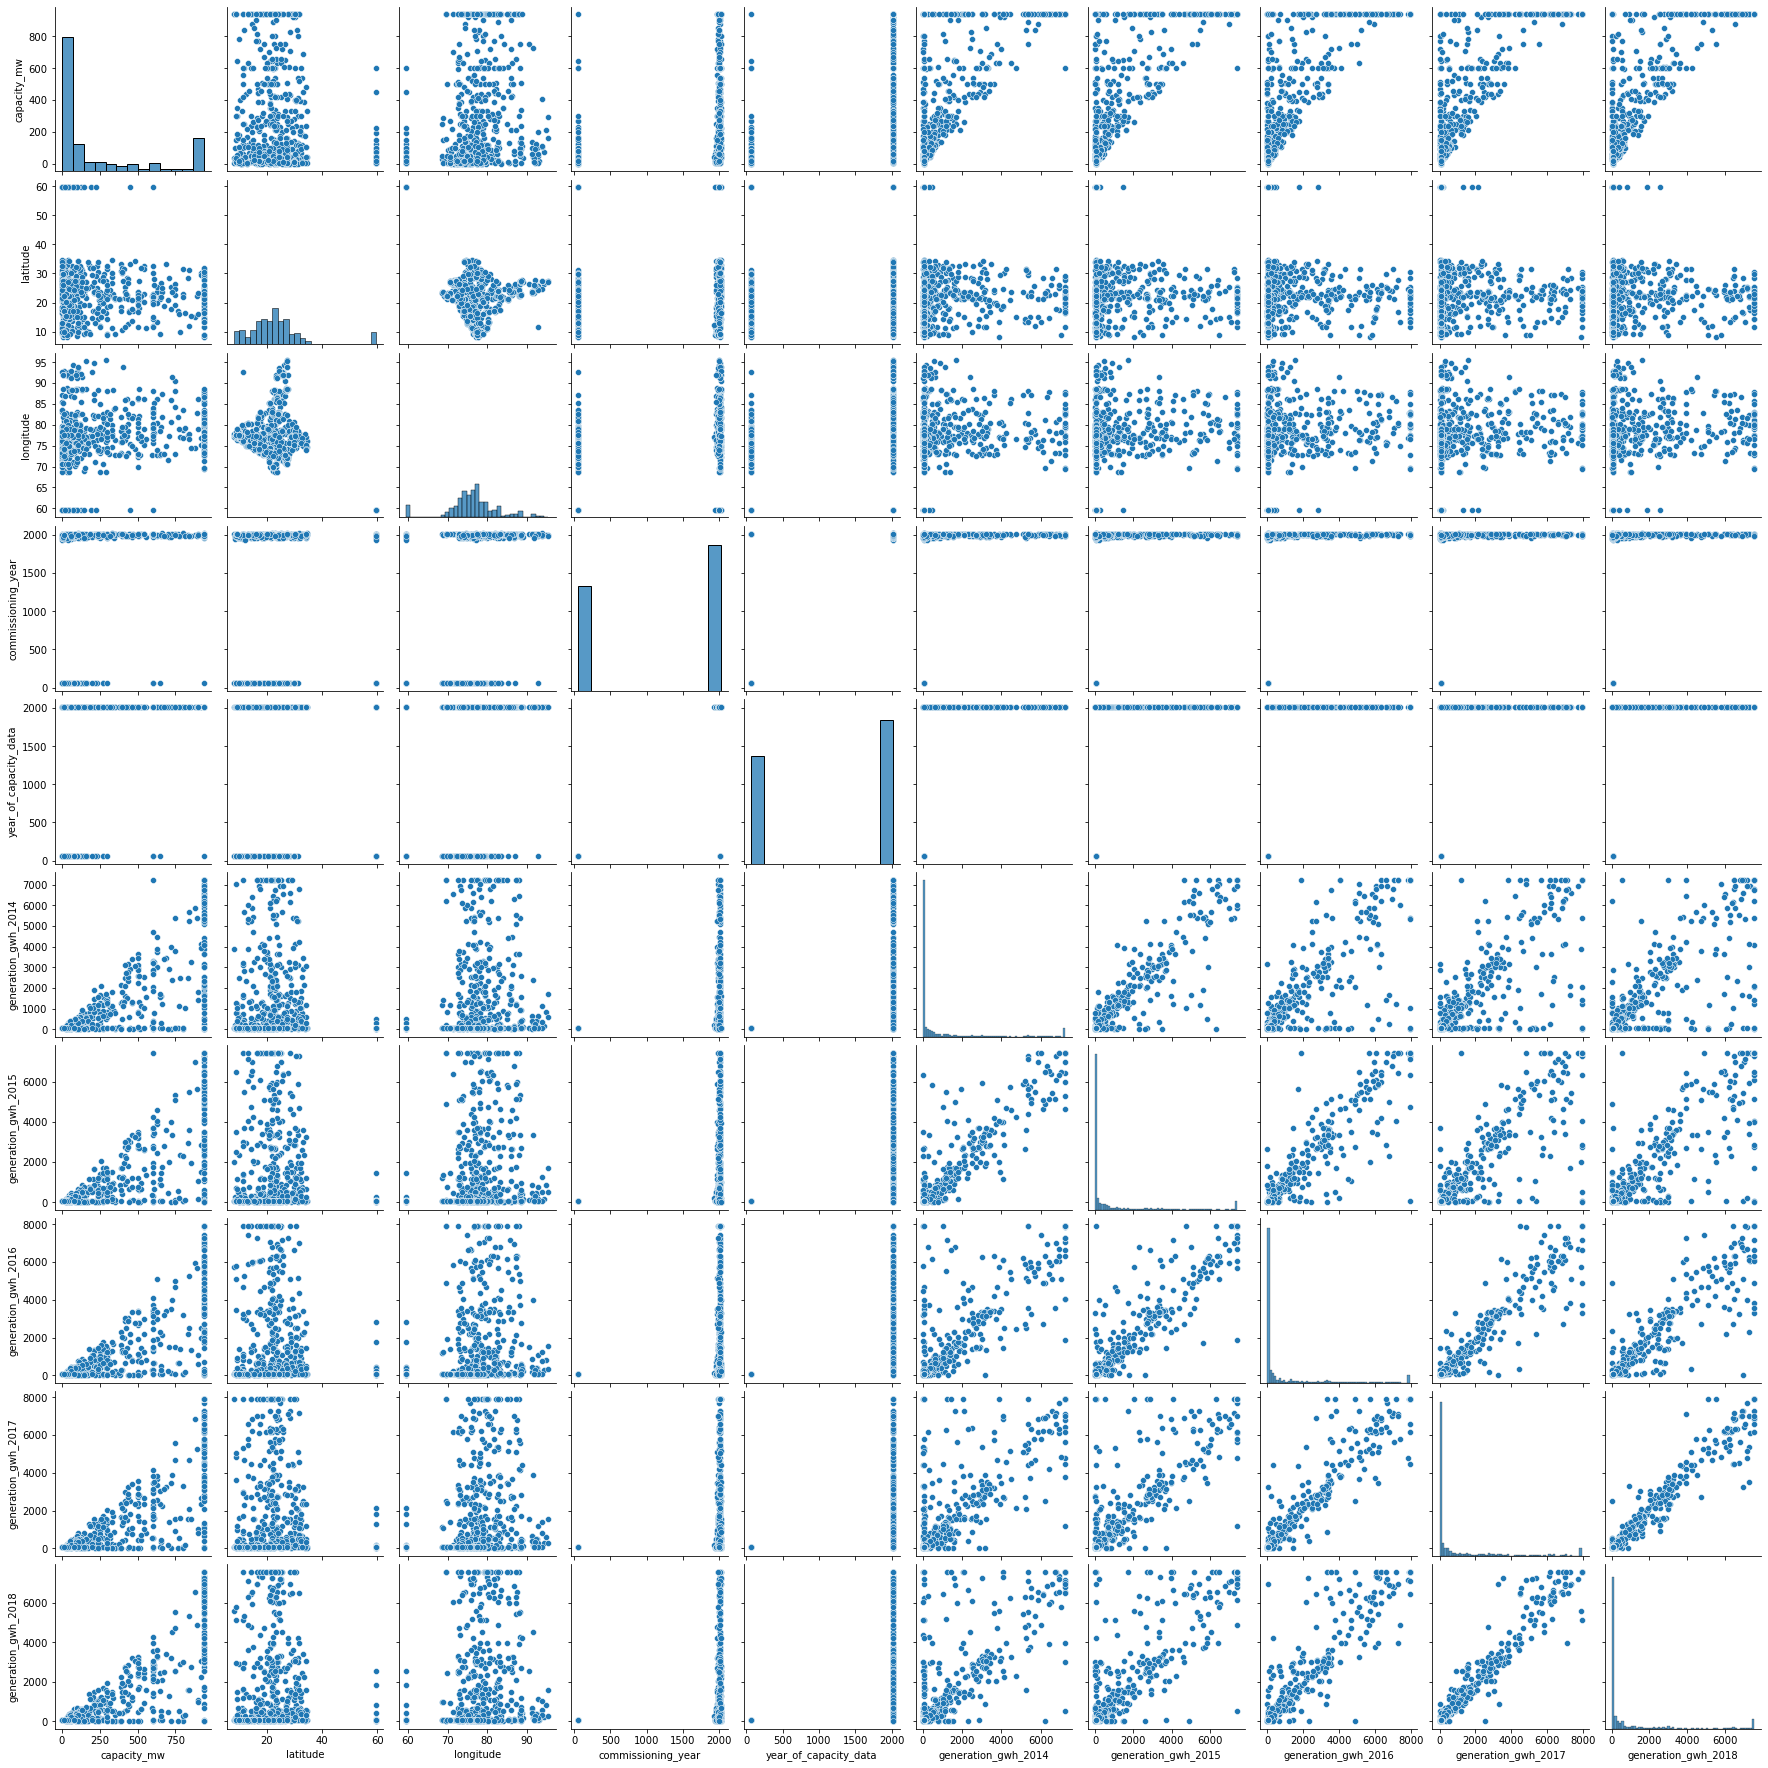

In [113]:
plt.figure(figsize=(12,8))
sns.pairplot(df)

LinAlgError: singular matrix

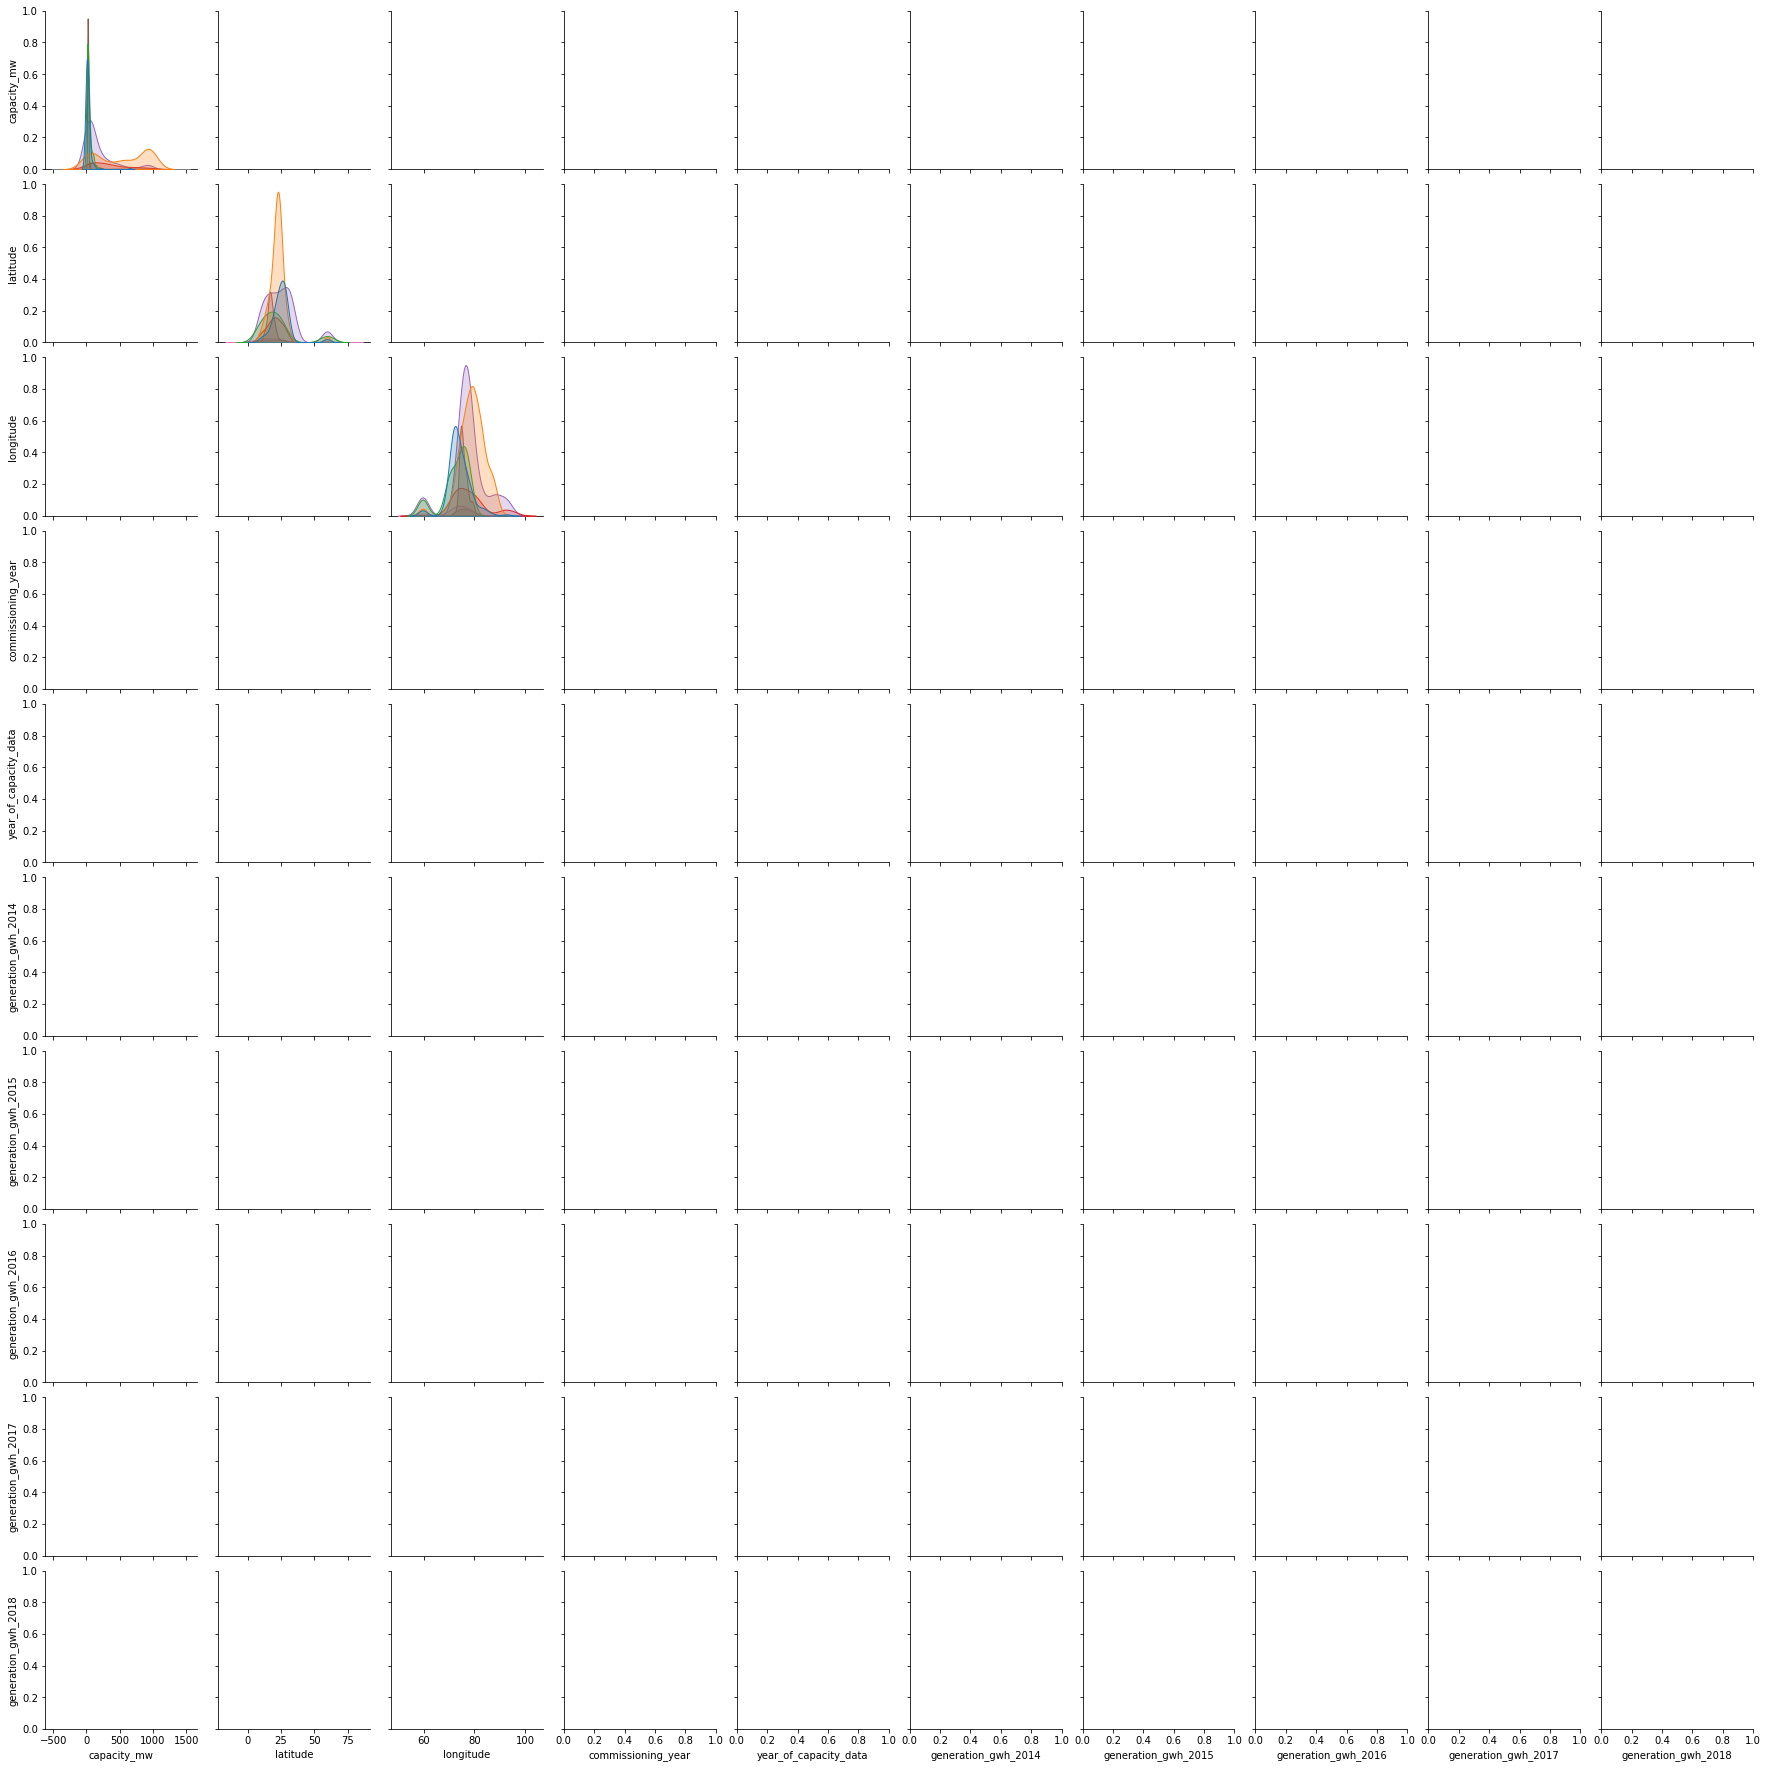

In [114]:
sns.pairplot(df, hue = 'primary_fuel')

## Observation:
Pairplot shows that coal is associated with the high capacity.

In [115]:
sns.set_style('darkgrid')
plt.rcParams['font.size'] = 14
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['figure.facecolor'] = '#00000000'

In [116]:
main_primary_fuel = df.primary_fuel.value_counts() * 100 / df.primary_fuel.count()
main_primary_fuel

Coal       28.476821
Hydro      27.704194
Solar      14.017660
Wind       13.465784
Gas         7.615894
Biomass     5.518764
Oil         2.207506
Nuclear     0.993377
Name: primary_fuel, dtype: float64

# Primary Fuel

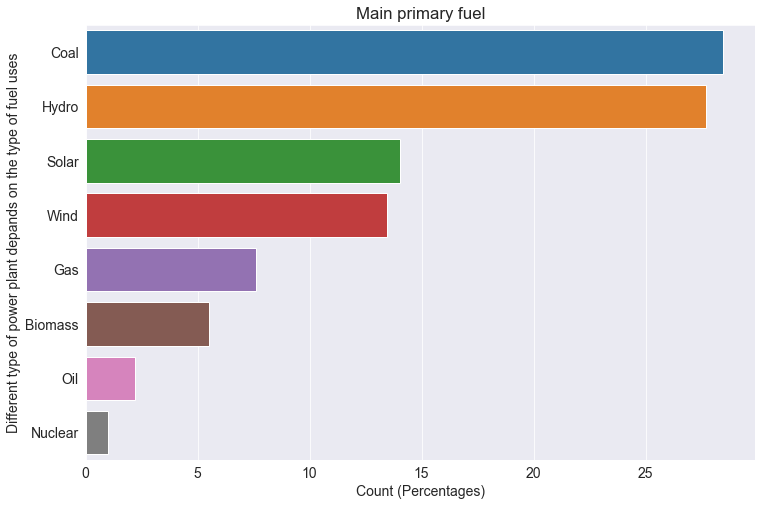

In [117]:
sns.barplot(x = main_primary_fuel, y = main_primary_fuel.index)
plt.title('Main primary fuel')
plt.xlabel('Count (Percentages)');
plt.ylabel('Different type of power plant depands on the type of fuel uses');

## Observation:
- Coal energy-based power plants have higher percentages that are beneficial to our future generation. 
- Global warming is the next major threat that we all have to face. 
- It is a good sign that the use of hydro, solar and wind power plants is increasing.

# capacity_mw

# Type of power plant and their capacity

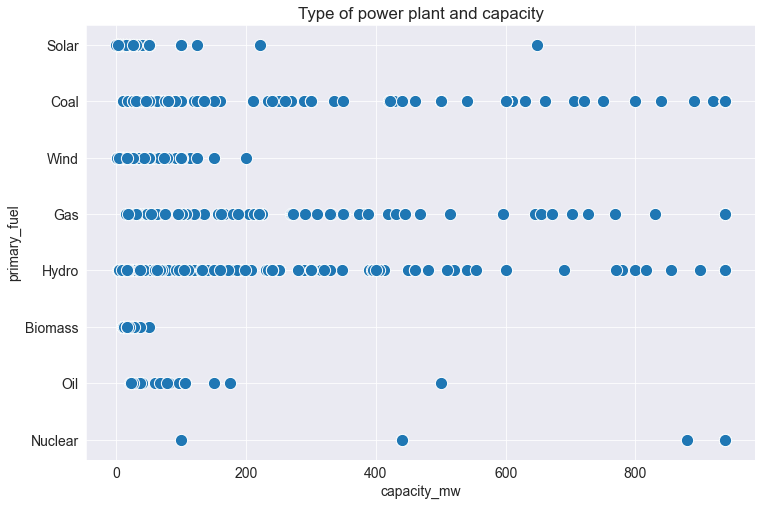

In [118]:
sns.scatterplot(x = df.capacity_mw, y = df.primary_fuel, s = 150)
plt.title('Type of power plant and capacity');

# Conclusion:-
- The Hydro Power Plant has most of the high-capacity power plant. There is only 0.67 per cent of the nuclear power plant, but the capacity of the power plant is high. In spite of having a higher percentage, the solar power plant has a small capacity.

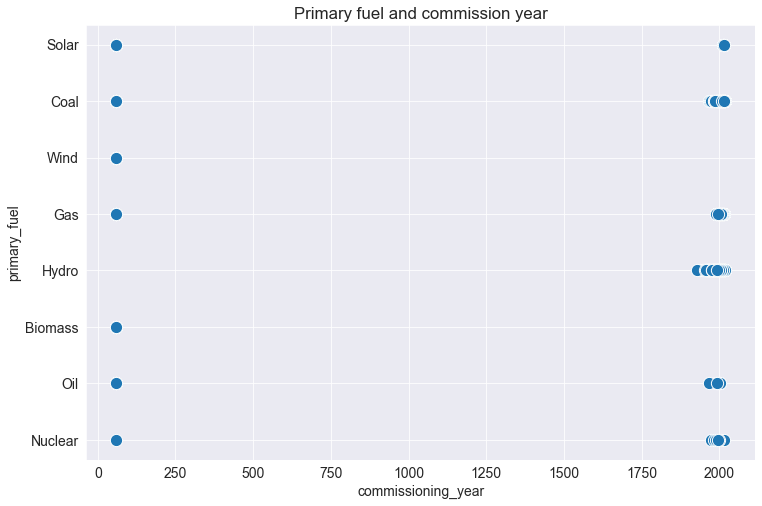

In [119]:
sns.scatterplot(x = df.commissioning_year, y = df.primary_fuel, s = 150);
plt.title('Primary fuel and commission year');

# Conclusion:
- It is clear that from the beginning, the hydro power plant is the most popular among the other plants, and every country continues to build this type of plant
- renewable energy-based power plants (e.g. solar, wind) became more popular on the other hand popularity of nuclear power plants declined. Because the world saw the devastating effects of the nuclear power plant during the Chernobyl and Fukushima Daiichi nuclear disasters.

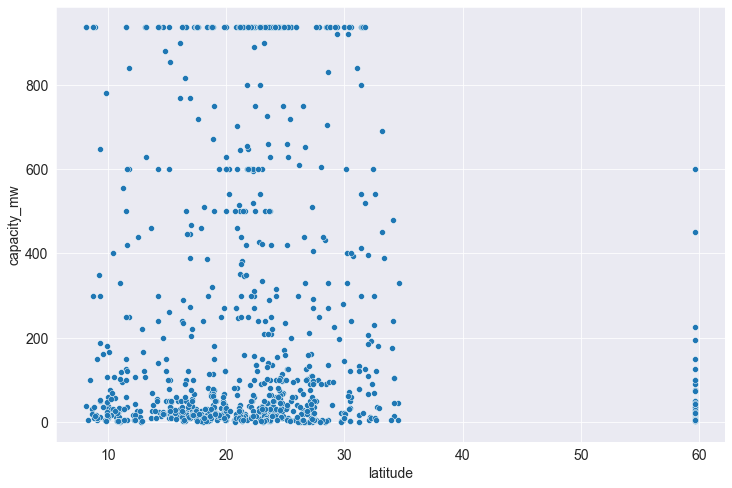

In [120]:
sns.scatterplot(x = "latitude", y = "capacity_mw", data = df)
plt.show()

In the above scatter plot we can see that the latitude geolocation for electricty generation is highest measuring the mega watts between 20 to 40 decimal degrees.

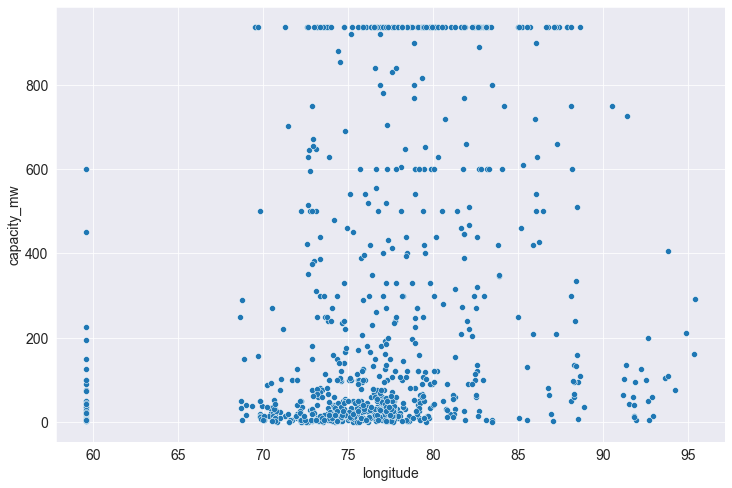

In [122]:
sns.scatterplot(x = "longitude", y = "capacity_mw", data = df)
plt.show()

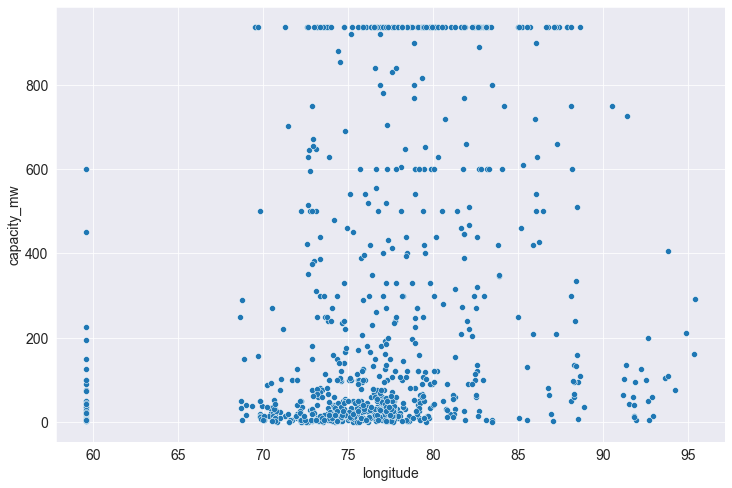

In [123]:
sns.scatterplot(x = "longitude", y = "capacity_mw", data = df)
plt.show()

In the above scatter plot we can see that the longitude geolocation for electricty generation is highest measuring the mega watts between -60 to -90 and then again between 0-50 after that 100  to 150  decimal degrees

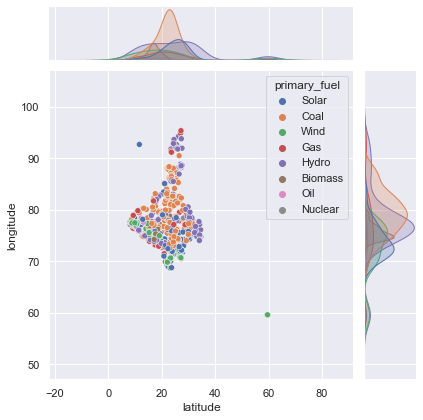

In [125]:
sns.set_theme(style="darkgrid")
sns.jointplot(data=df, x='latitude', y='longitude', hue='primary_fuel')

## Observation:-
- The Primary fuel of GAS has the greatest degree of Latitude, which ranges from 30 to 40
- The Primary fuel of SOLAR has the greatest degree of longitude, which ranges from 30 to 35

<AxesSubplot:xlabel='capacity_mw', ylabel='primary_fuel'>

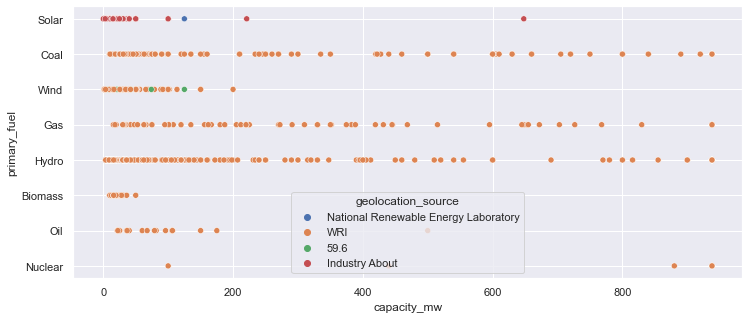

In [126]:
plt.figure(figsize=(12,5))
sns.scatterplot(data=df, x='capacity_mw', y='primary_fuel', hue='geolocation_source')

<AxesSubplot:xlabel='primary_fuel', ylabel='capacity_mw'>

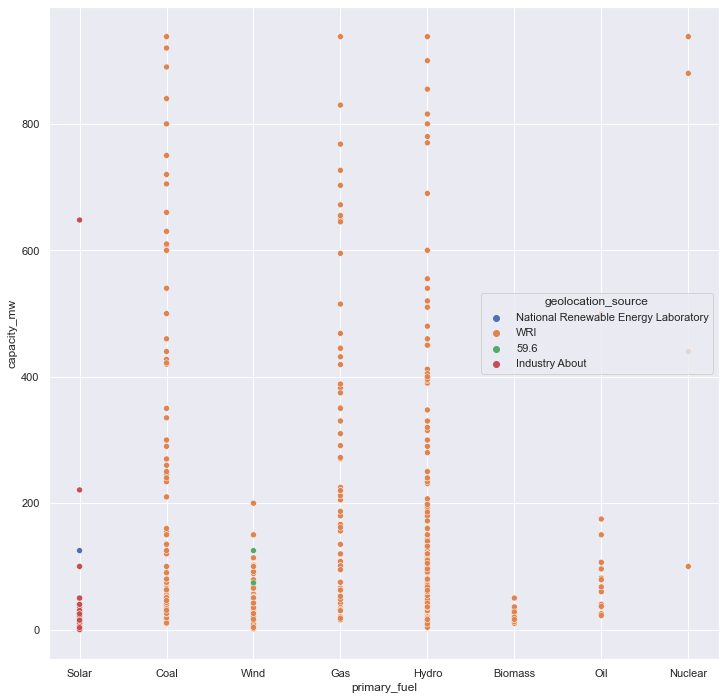

In [127]:
fig,axes=plt.subplots(1,1,figsize=(12,12))
sns.scatterplot(x='primary_fuel',y='capacity_mw',hue='geolocation_source',data=df)

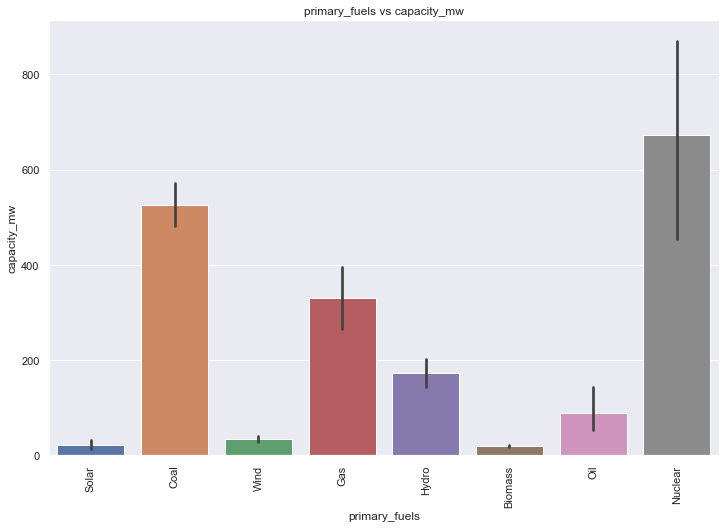

In [128]:
sns.barplot(x = df.primary_fuel, y = df.capacity_mw)
plt.xticks(rotation = 90)
plt.title('primary_fuels vs capacity_mw')
plt.ylabel('capacity_mw')
plt.xlabel('primary_fuels');

## Observation:
from the above plot we can see that nucliear is the highest mean to generate electricity

In [ ]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='generation_gwh_2016',y='capacity_mw',hue='primary_fuel', data=df)

In [ ]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='generation_gwh_2017',y='capacity_mw',hue='primary_fuel', data=df)

In [ ]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='generation_gwh_2018',y='capacity_mw',hue='primary_fuel', data=df)

## Observation:
- It is clearly seen that for every year the generating power is increase in every country.

- It is clearly seen that for every year the generating power is increase in every country.

- To make comparison more easier, stacked bar plot is used for each of the years.

In [135]:
df.primary_fuel.unique()

array(['Solar', 'Coal', 'Wind', 'Gas', 'Hydro', 'Biomass', 'Oil',
       'Nuclear'], dtype=object)

# Conlusion:
- First we need to select the renewable or green energy based fuel from the list.

- Renewable energy:

- Hydro Wind Solar Waste Biomass Wave and Tidal Geothermal Energy Storage

# Checking Outlier

capacity_mw                 AxesSubplot(0.125,0.787927;0.168478x0.0920732)
latitude                 AxesSubplot(0.327174,0.787927;0.168478x0.0920732)
longitude                AxesSubplot(0.529348,0.787927;0.168478x0.0920732)
commissioning_year       AxesSubplot(0.731522,0.787927;0.168478x0.0920732)
year_of_capacity_data       AxesSubplot(0.125,0.677439;0.168478x0.0920732)
generation_gwh_2014      AxesSubplot(0.327174,0.677439;0.168478x0.0920732)
generation_gwh_2015      AxesSubplot(0.529348,0.677439;0.168478x0.0920732)
generation_gwh_2016      AxesSubplot(0.731522,0.677439;0.168478x0.0920732)
generation_gwh_2017         AxesSubplot(0.125,0.566951;0.168478x0.0920732)
generation_gwh_2018      AxesSubplot(0.327174,0.566951;0.168478x0.0920732)
dtype: object

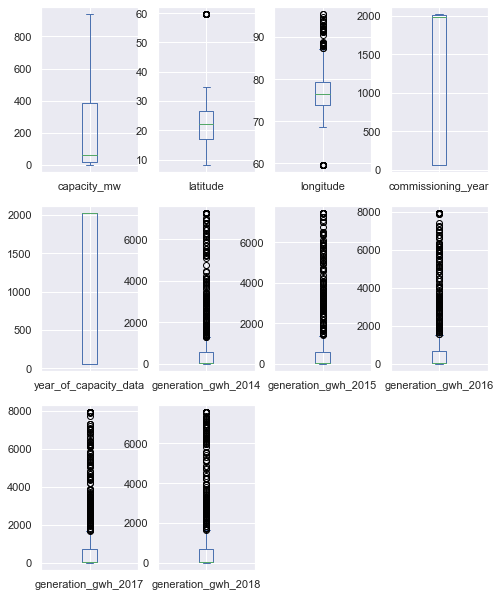

In [132]:
df.plot(kind='box',subplots=True,figsize=(8,25),layout=(7,4))
# plotting individual graph for better understanding of graph

In [133]:
cols_with_outliers = ['capacity_mw','generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018']

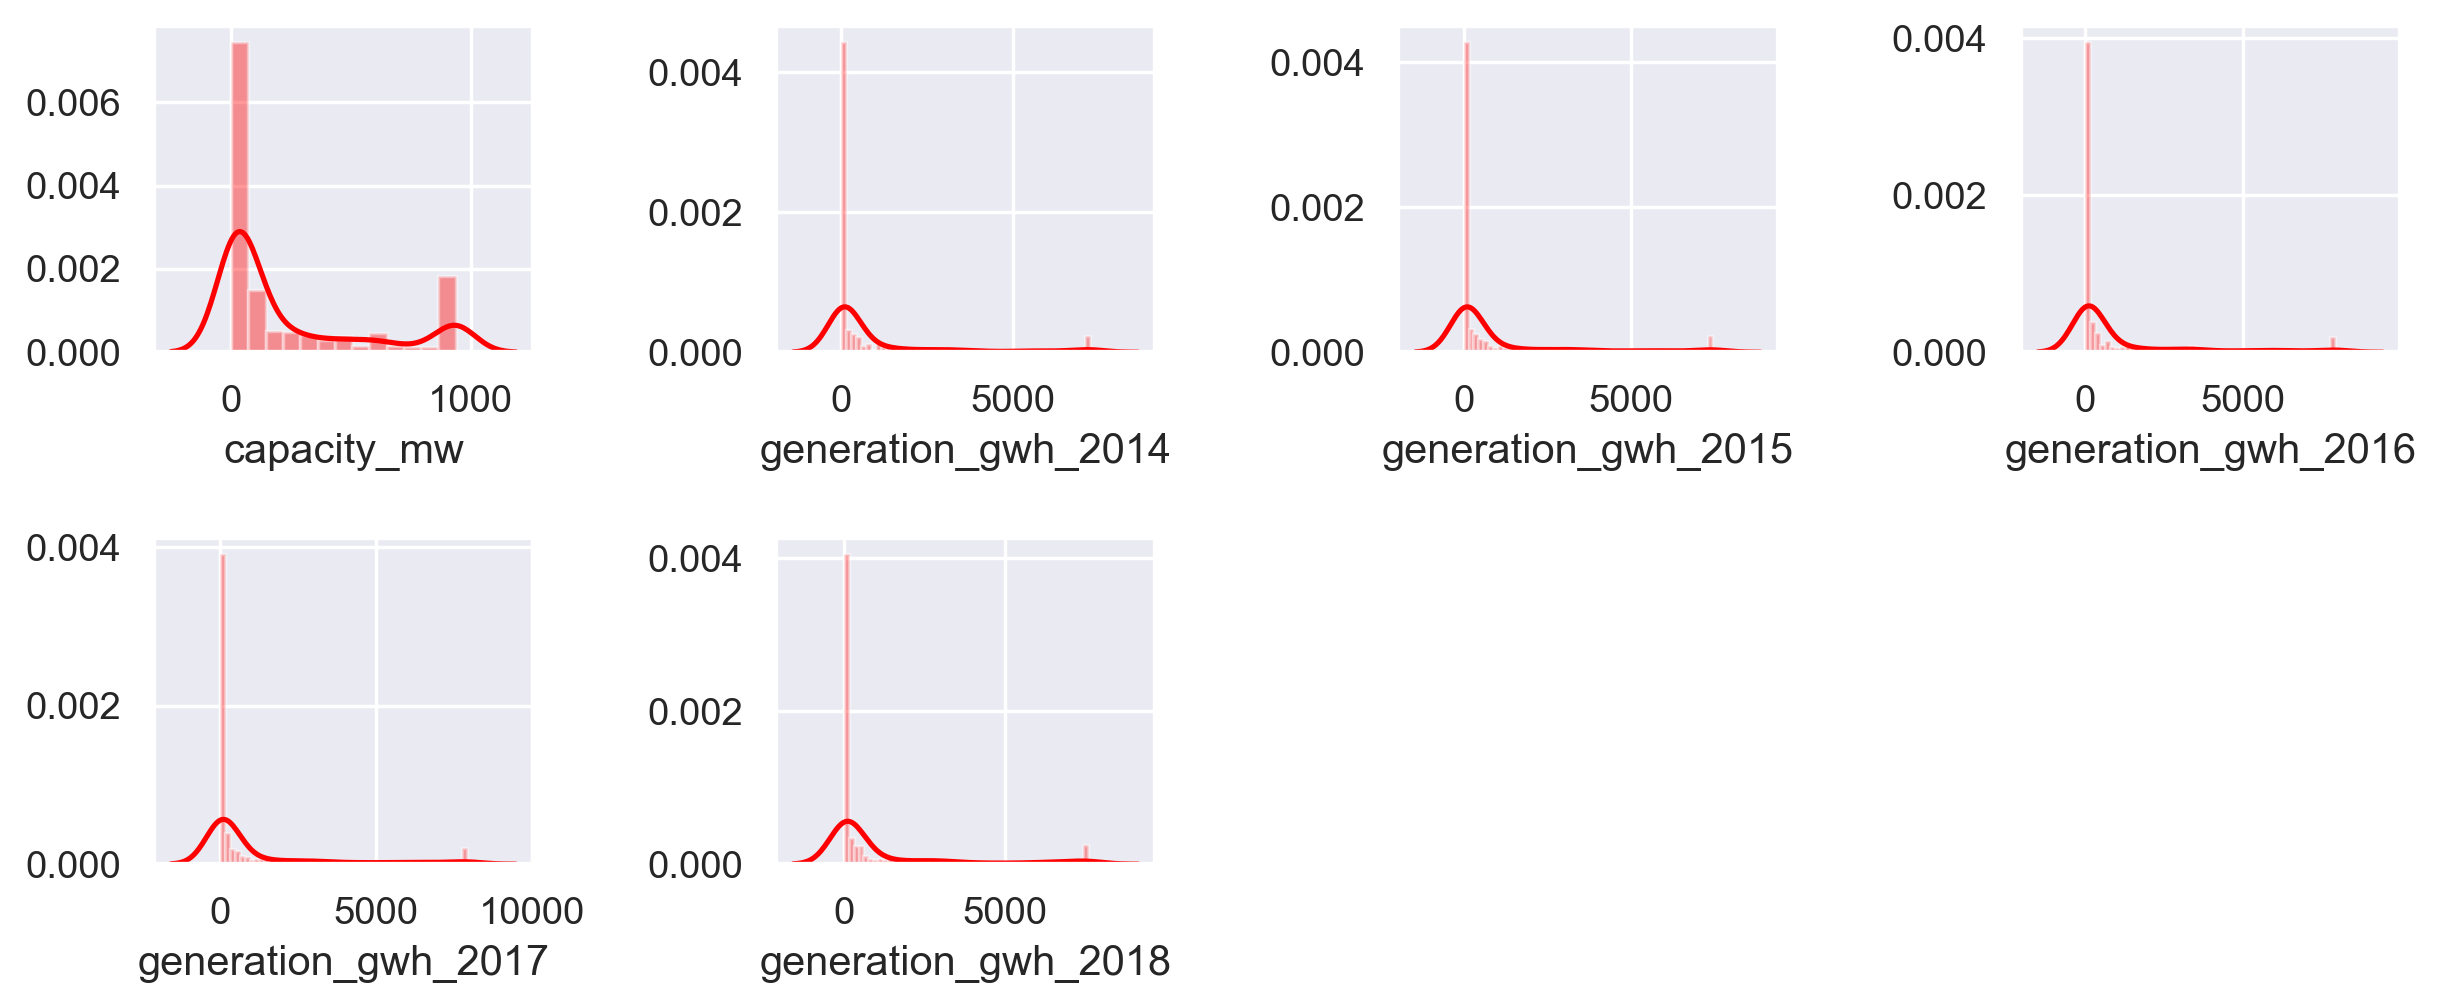

In [134]:
plt.figure(figsize = (10, 10), dpi=250)
for i in range(0, len(cols_with_outliers)):
    plt.subplot(5, 4, i+1)
    sns.distplot(df[cols_with_outliers[i]], color = 'red')
    plt.ylabel('')

# plt.suptitle('Outliers Before Cleansing', y = 0.1)
plt.tight_layout(pad = 1.5)
plt.show()

In [7]:
for feature in cols_with_outliers:
    IQR = df[feature].quantile(0.75) - df[feature].quantile(0.25)
    upper_bond = df[feature].quantile(0.75) + (IQR * 1.5)
    lower_bond = df[feature].quantile(0.25) - (IQR * 1.5)
    
    df[feature] = np.where(df[feature]>upper_bond,upper_bond,df[feature])
    df[feature] = np.where(df[feature]<lower_bond,lower_bond,df[feature])

capacity_mw                 AxesSubplot(0.125,0.787927;0.168478x0.0920732)
latitude                 AxesSubplot(0.327174,0.787927;0.168478x0.0920732)
longitude                AxesSubplot(0.529348,0.787927;0.168478x0.0920732)
commissioning_year       AxesSubplot(0.731522,0.787927;0.168478x0.0920732)
year_of_capacity_data       AxesSubplot(0.125,0.677439;0.168478x0.0920732)
generation_gwh_2014      AxesSubplot(0.327174,0.677439;0.168478x0.0920732)
generation_gwh_2015      AxesSubplot(0.529348,0.677439;0.168478x0.0920732)
generation_gwh_2016      AxesSubplot(0.731522,0.677439;0.168478x0.0920732)
generation_gwh_2017         AxesSubplot(0.125,0.566951;0.168478x0.0920732)
generation_gwh_2018      AxesSubplot(0.327174,0.566951;0.168478x0.0920732)
dtype: object

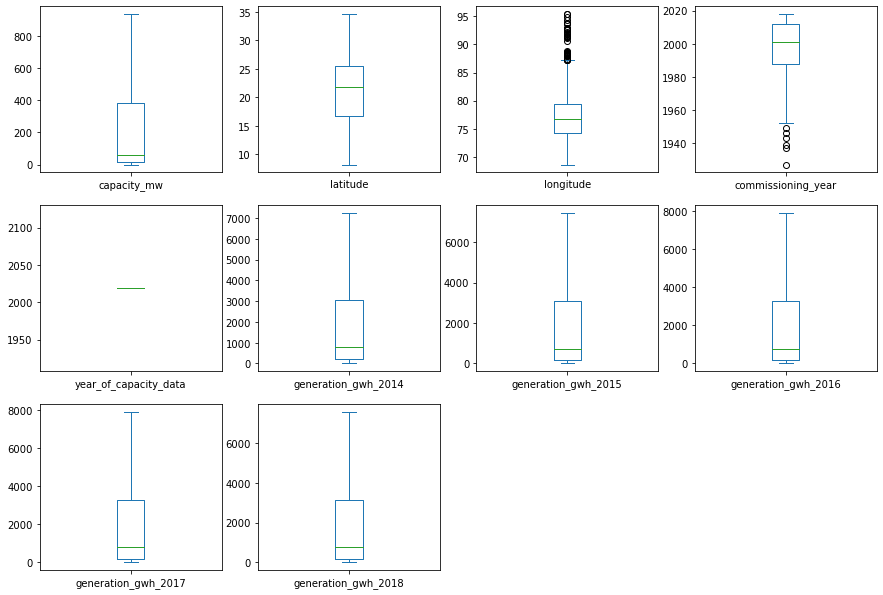

In [8]:

df.plot(kind='box',subplots=True,figsize=(15,25),layout=(7,4))
# plotting individual graph for better understanding of graph

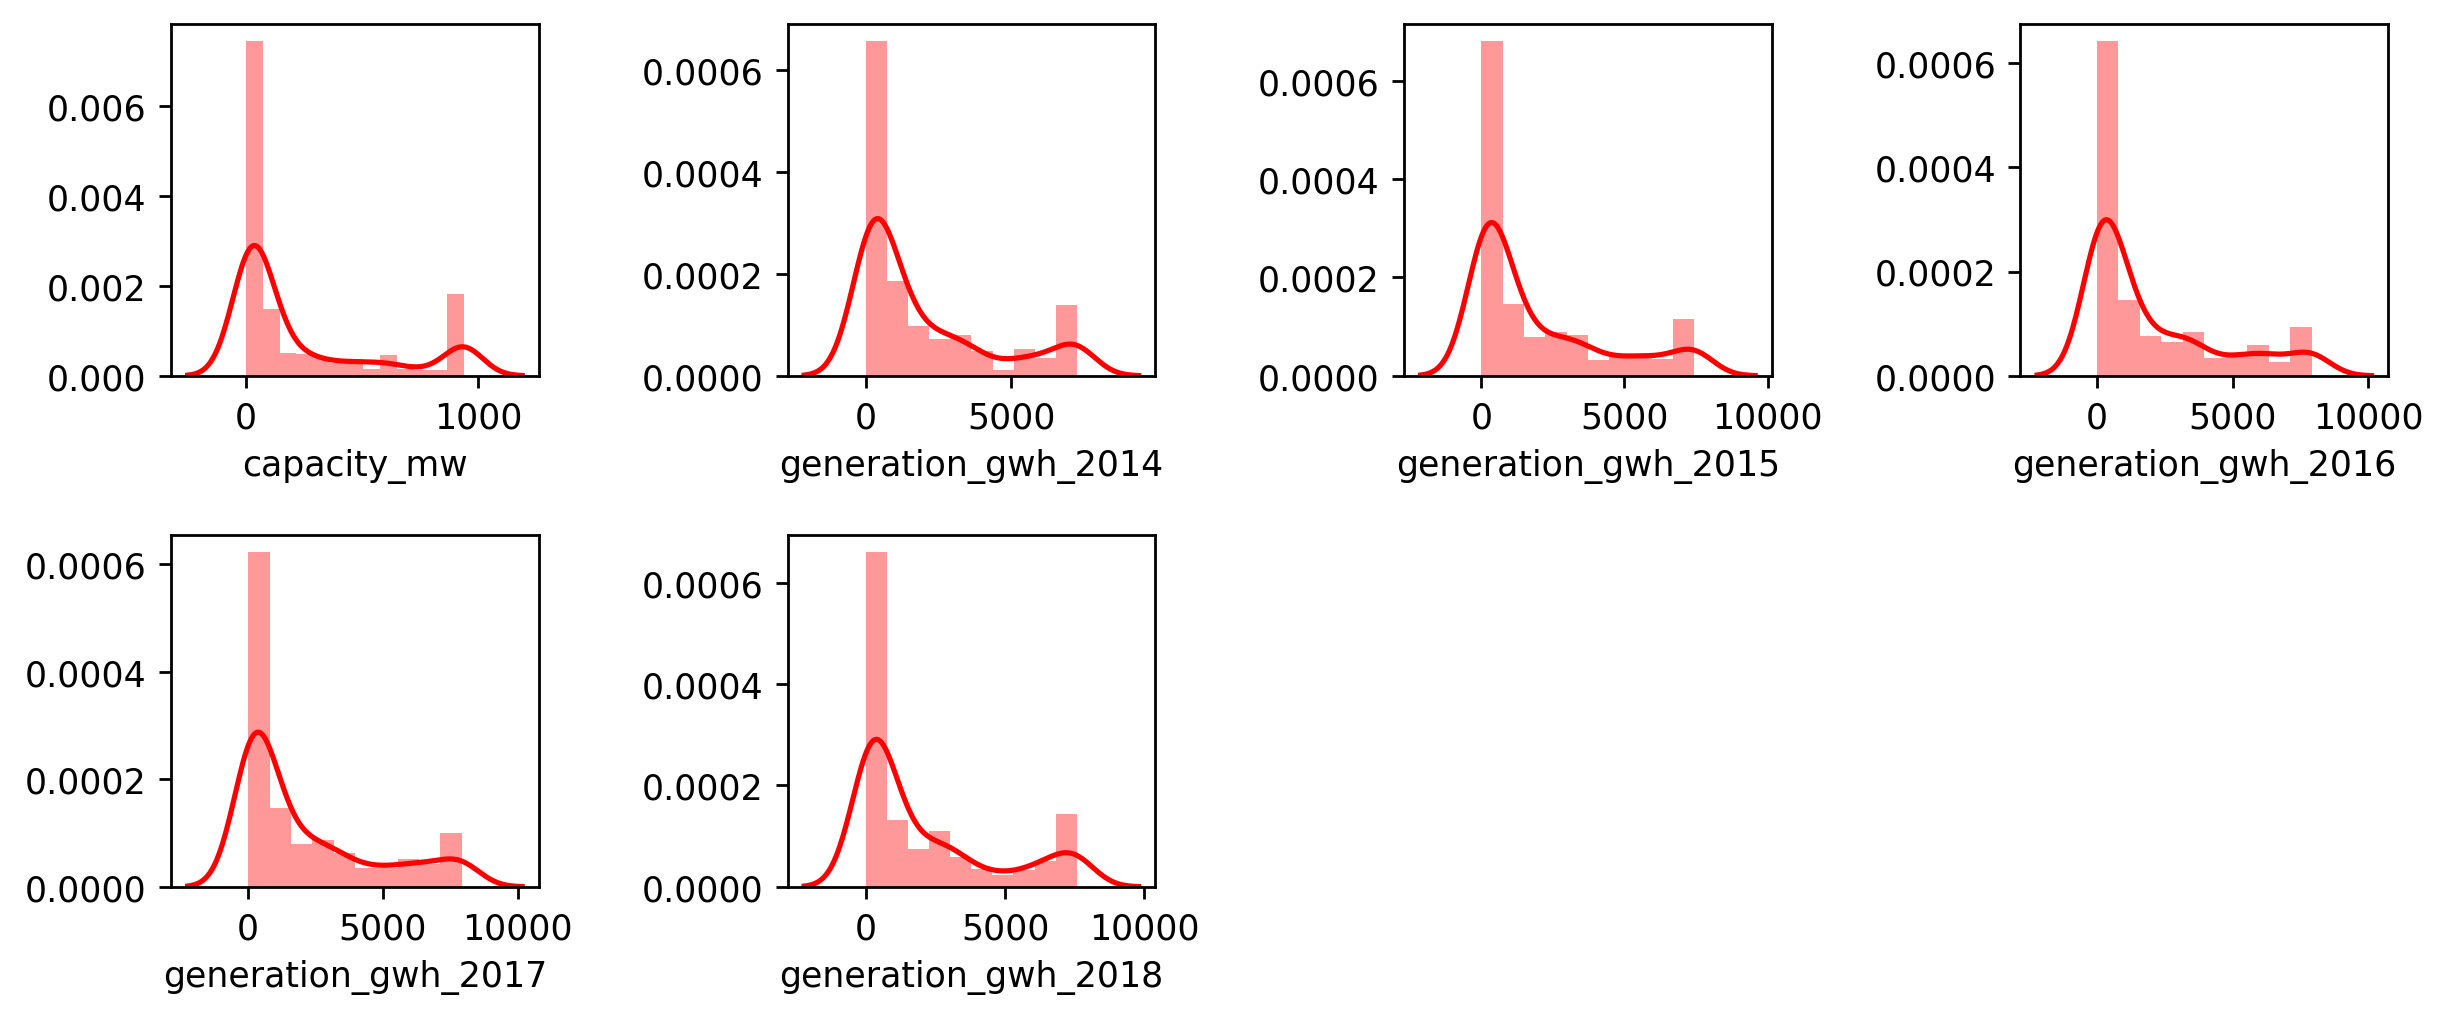

In [9]:
plt.figure(figsize = (10, 10), dpi=250)
for i in range(0, len(cols_with_outliers)):
    plt.subplot(5, 4, i+1)
    sns.distplot(df[cols_with_outliers[i]], color = 'red')
    plt.ylabel('')

# plt.suptitle('Outliers Before Cleansing', y = 0.1)
plt.tight_layout(pad = 1.5)
plt.show()

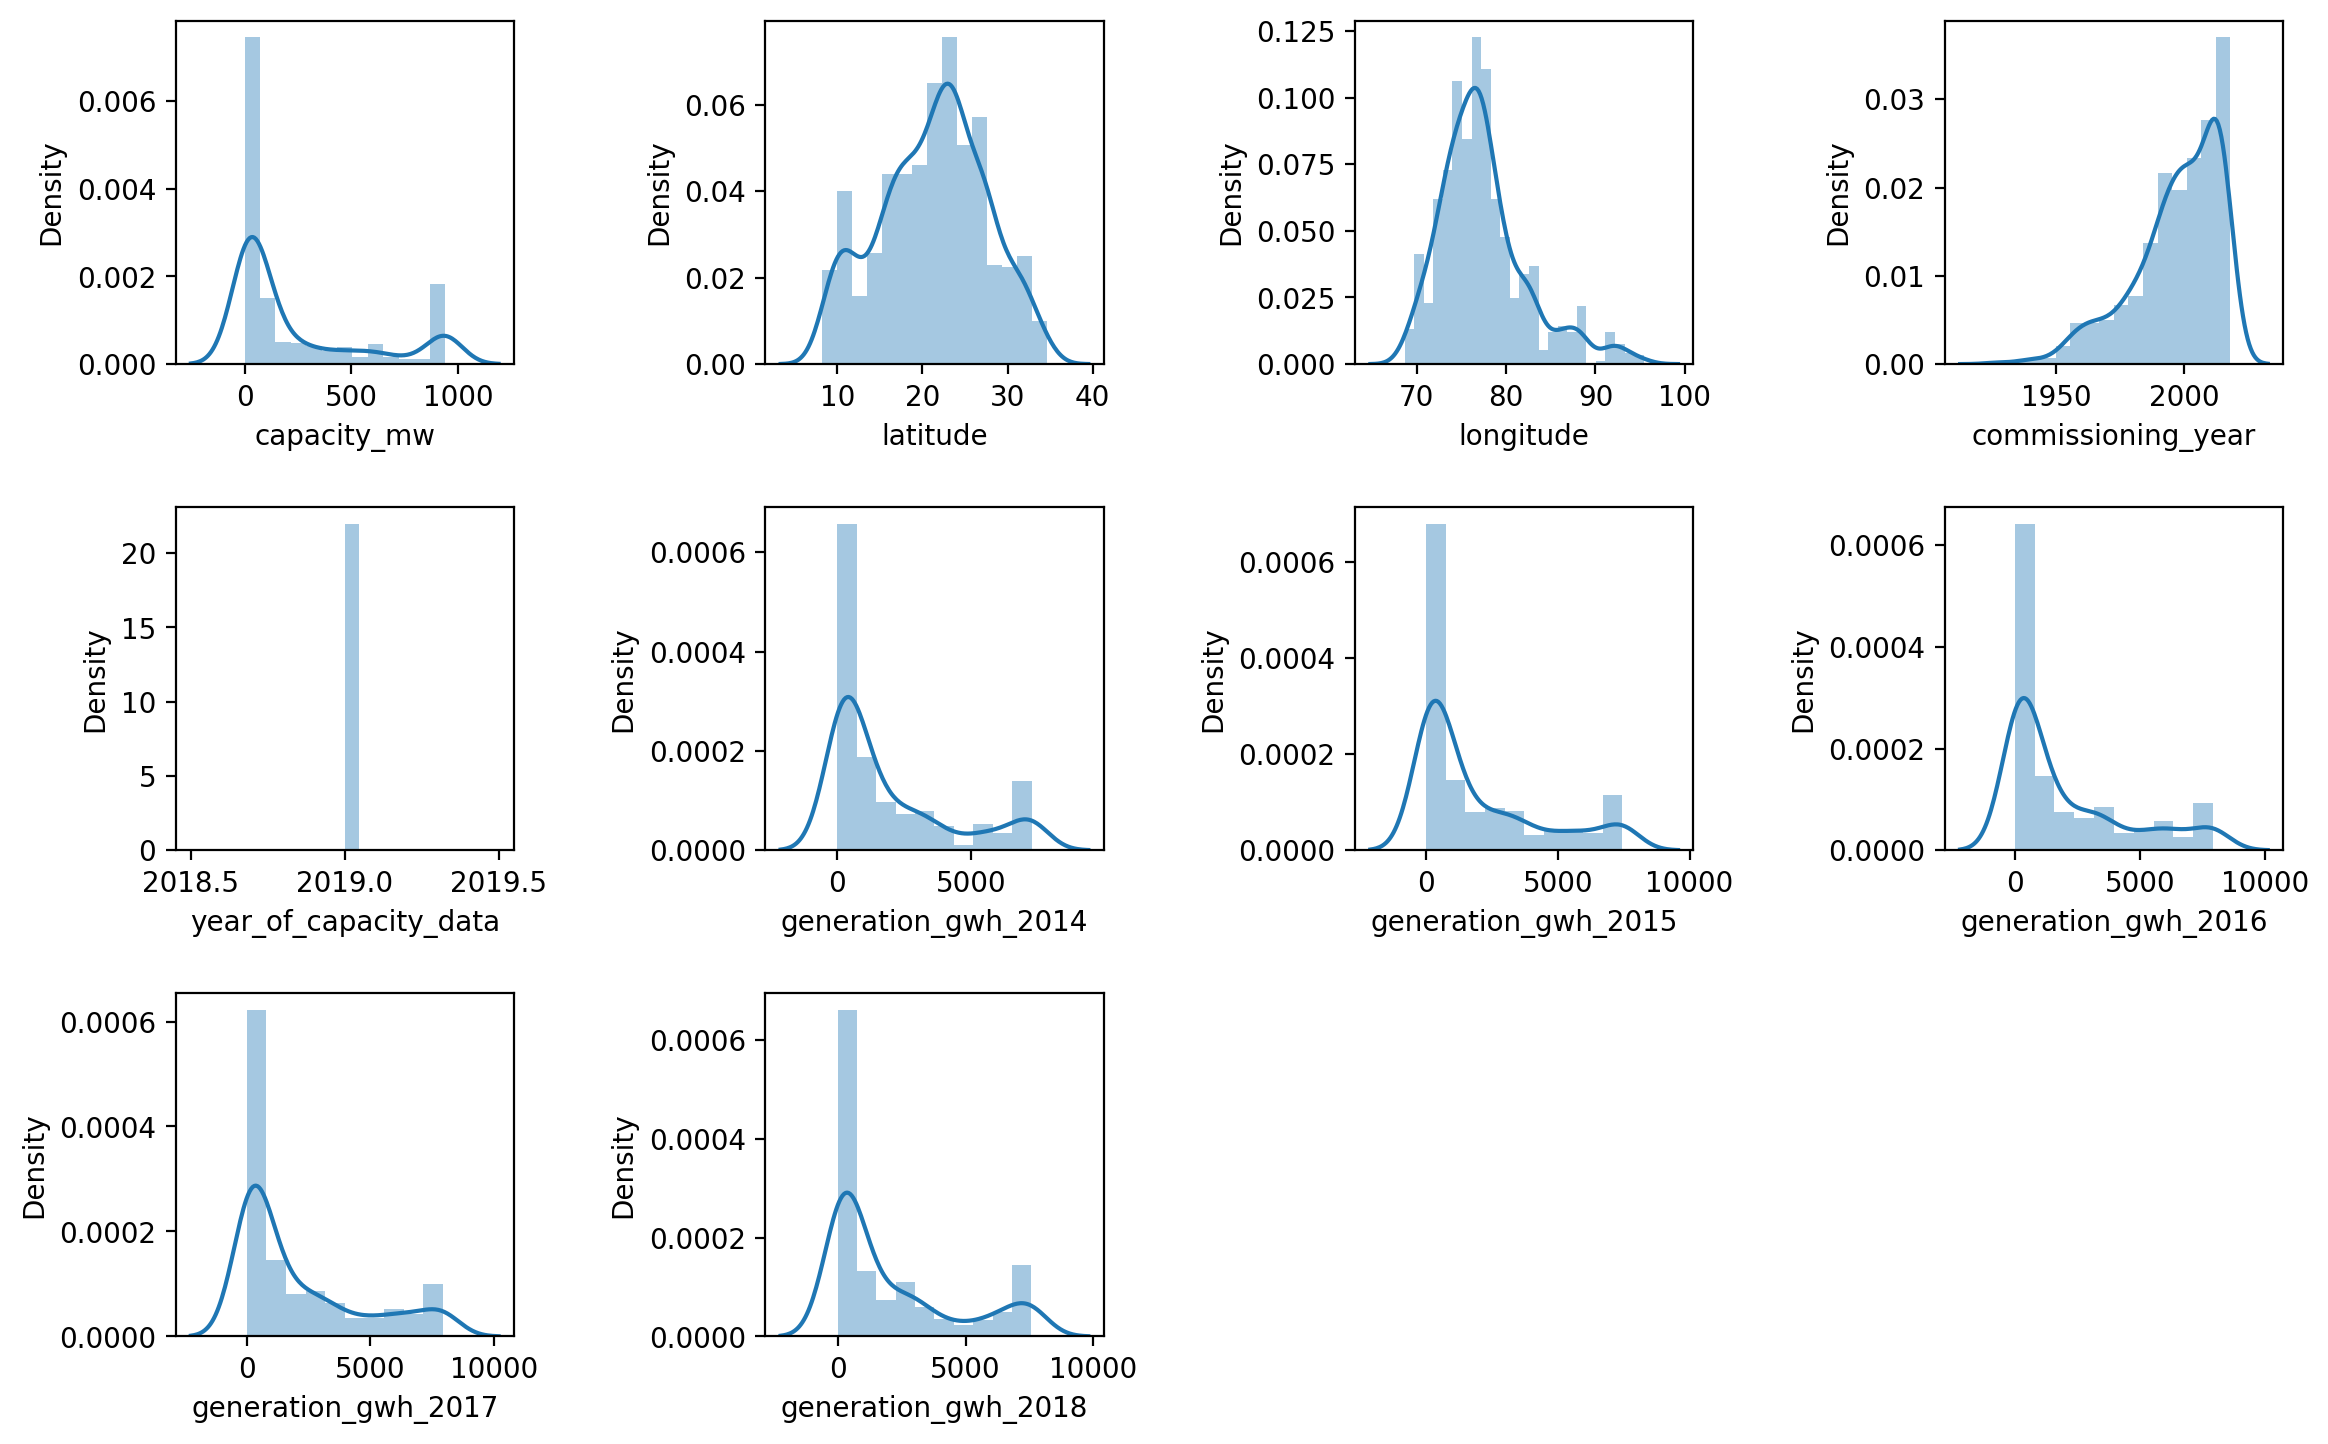

In [12]:
plt.figure(figsize=(12,12),dpi=200)
for i in enumerate(df[numerical_features]):
    plt.subplot(5,4,i[0]+1)
    sns.distplot(df[i[1]])
    plt.tight_layout(pad=2.0)

In [11]:

categorical_features = [feature for feature in df.columns if df[feature].dtype == "O"]
numerical_features = [feature for feature in df.columns if df[feature].dtype != "O"]

In [13]:
df2 = df.copy()

In [14]:
df2.head()

capacity_mw  latitude  longitude primary_fuel other_fuel1  \
0       2.5000   28.1839    73.2407        Solar         NaN   
1      98.0000   24.7663    74.6090         Coal         NaN   
2      39.2000   21.9038    69.3732         Wind         NaN   
3     135.0000   23.8712    91.3602          Gas         NaN   
4     938.0375   21.9603    82.4091         Coal         Oil   

   commissioning_year                    geolocation_source  \
0              2011.0  National Renewable Energy Laboratory   
1                 NaN                                   WRI   
2                 NaN                                   WRI   
3              2004.0                                   WRI   
4              2015.0                                   WRI   

   year_of_capacity_data  generation_gwh_2014  generation_gwh_2015  \
0                    NaN                  NaN                  NaN   
1                    NaN                  NaN                  NaN   
2                    NaN                  NaN                  NaN   
3                 2019.0           617.789264              843.747   
4                 2019.0          3035.550000             5916.370   

   generation_gwh_2016  generation_gwh_2017  generation_gwh_2018  
0                  NaN                  NaN                  NaN  
1                  NaN                  NaN                  NaN  
2                  NaN                  NaN                  NaN  
3           886.004428           663.774500           626.239128  
4          6243.000000          5385.579736          7279.000000

In [15]:
df2.fillna(df2.median(), inplace=True)

In [16]:
df2.drop('other_fuel1', axis=1, inplace=True)

<AxesSubplot:>

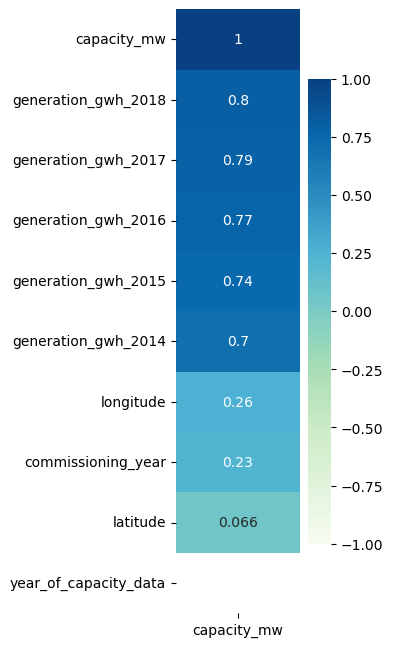

In [17]:
plt.figure(figsize=(2,8), dpi=100)
sns.heatmap(df2.corr()[['capacity_mw']].sort_values(by='capacity_mw',ascending= False ), vmin=-1,vmax=1,annot= True ,cmap='GnBu')

In [18]:
df2.dropna(inplace=True)

In [19]:
df2.isnull().sum()

capacity_mw              0
latitude                 0
longitude                0
primary_fuel             0
commissioning_year       0
geolocation_source       0
year_of_capacity_data    0
generation_gwh_2014      0
generation_gwh_2015      0
generation_gwh_2016      0
generation_gwh_2017      0
generation_gwh_2018      0
dtype: int64

In [20]:
df2.head(2)

capacity_mw  latitude  longitude primary_fuel  commissioning_year  \
0          2.5   28.1839    73.2407        Solar              2011.0   
1         98.0   24.7663    74.6090         Coal              2001.0   

                     geolocation_source  year_of_capacity_data  \
0  National Renewable Energy Laboratory                 2019.0   
1                                   WRI                 2019.0   

   generation_gwh_2014  generation_gwh_2015  generation_gwh_2016  \
0           801.123775           711.181225            737.20545   
1           801.123775           711.181225            737.20545   

   generation_gwh_2017  generation_gwh_2018  
0            817.97725           751.644375  
1            817.97725           751.644375

In [21]:
le = LabelEncoder()

In [22]:
df2['primary_fuel']=le.fit_transform(df2['primary_fuel'])
df2['geolocation_source']=le.fit_transform(df2['geolocation_source'])

df2.head()

capacity_mw  latitude  longitude  primary_fuel  commissioning_year  \
0       2.5000   28.1839    73.2407             6              2011.0   
1      98.0000   24.7663    74.6090             1              2001.0   
2      39.2000   21.9038    69.3732             7              2001.0   
3     135.0000   23.8712    91.3602             2              2004.0   
4     938.0375   21.9603    82.4091             1              2015.0   

   geolocation_source  year_of_capacity_data  generation_gwh_2014  \
0                   1                 2019.0           801.123775   
1                   2                 2019.0           801.123775   
2                   2                 2019.0           801.123775   
3                   2                 2019.0           617.789264   
4                   2                 2019.0          3035.550000   

   generation_gwh_2015  generation_gwh_2016  generation_gwh_2017  \
0           711.181225           737.205450           817.977250   
1           711.181225           737.205450           817.977250   
2           711.181225           737.205450           817.977250   
3           843.747000           886.004428           663.774500   
4          5916.370000          6243.000000          5385.579736   

   generation_gwh_2018  
0           751.644375  
1           751.644375  
2           751.644375  
3           626.239128  
4          7279.000000

In [23]:
y1 = df2['primary_fuel']

In [24]:
x1 = df2.drop('primary_fuel', axis=1)
x1

capacity_mw  latitude  longitude  commissioning_year  geolocation_source  \
0         2.5000   28.1839    73.2407              2011.0                   1   
1        98.0000   24.7663    74.6090              2001.0                   2   
2        39.2000   21.9038    69.3732              2001.0                   2   
3       135.0000   23.8712    91.3602              2004.0                   2   
4       938.0375   21.9603    82.4091              2015.0                   2   
5       250.0000   23.7689    68.6447              2005.0                   2   
6        60.0000   10.4547    77.0078              1970.0                   2   
7       192.0000   32.2258    77.2070              2010.0                   2   
8       290.0000   16.3300    75.8863              2004.0                   2   
9       210.0000   23.1642    81.6373              2008.0                   2   
10      938.0375   21.0782    77.9009              2014.0                   2   
11      134.0000   31.2717    76.4938              1985.0                   2   
12      938.0375   24.2007    82.8000              2011.0                   2   
13       16.9500   31.2412    77.8769              1986.0                   2   
14        9.0000   21.7800    76.7195              1987.0                   2   
15      938.0375   24.2010    82.7891              2000.0                   2   
16      419.3300   25.1797    76.3188              1989.0                   2   
17      600.0000   23.0666    81.7841              2001.0                   2   
18      938.0375   23.0655    81.7865              2015.0                   2   
19       10.0000   18.0845    76.1851              2001.0                   2   
20       17.0000   19.5867    74.7061              2001.0                   2   
21       24.0000   16.7708    74.9191              2001.0                   2   
22      652.0000   26.6282    79.5286              1989.0                   2   
23      600.0000   21.7438    83.2741              2017.0                   2   
24       46.0000   19.7881    79.1518              2001.0                   2   
26        1.0000   28.3615    74.2402              2001.0                   0   
27       16.5000   14.5751    76.3926              2001.0                   2   
28       50.0000   14.9455    77.6870              2001.0                   0   
29      113.6000   18.8580    73.6396              2001.0                   2   
30       19.8000   10.7245    77.1893              2001.0                   2   
31       13.2000   14.4791    76.3482              2001.0                   2   
32        5.0000   27.3473    71.6917              2001.0                   0   
33        5.0000   27.3600    71.6918              2001.0                   0   
34        5.0000   27.3632    71.6918              2001.0                   0   
35        5.0000   27.3661    71.6916              2001.0                   0   
36        5.0000   27.3537    71.6917              2001.0                   0   
37        5.0000   27.3504    71.6918              2001.0                   0   
38        5.0000   27.3566    71.6917              2001.0                   0   
39      705.0000   28.5060    77.3066              1977.0                   2   
40       28.0000   16.2804    75.2250              2001.0                   2   
41      450.0000   33.1815    75.3155              2008.0                   2   
42      450.0000   21.7800    76.7195              2015.0                   2   
43      180.0000   32.8063    76.1418              1980.0                   2   
44      938.0375   23.8285    87.4513              2003.0                   2   
45      600.0000   21.7800    76.7195              2015.0                   2   
46      510.0000   18.1396    82.1221              1984.0                   2   
47       67.5000   19.8601    79.3421              2001.0                   2   
48       10.0000   24.6929    74.6890              2001.0                   2   
49      300.0000   22.3421    82.430

In [25]:
df2.head(2)

capacity_mw  latitude  longitude  primary_fuel  commissioning_year  \
0          2.5   28.1839    73.2407             6              2011.0   
1         98.0   24.7663    74.6090             1              2001.0   

   geolocation_source  year_of_capacity_data  generation_gwh_2014  \
0                   1                 2019.0           801.123775   
1                   2                 2019.0           801.123775   

   generation_gwh_2015  generation_gwh_2016  generation_gwh_2017  \
0           711.181225            737.20545            817.97725   
1           711.181225            737.20545            817.97725   

   generation_gwh_2018  
0           751.644375  
1           751.644375

In [26]:

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [27]:
def calc_vif(x1):
    vif=pd.DataFrame()
    vif["variables"]=x1.columns
    vif["VIF FACTOR"]=[variance_inflation_factor(x1.values,i) for i in range(x1.shape[1])]
    return(vif)

In [28]:
calc_vif(x1)

variables    VIF FACTOR
0             capacity_mw      3.283389
1                latitude      1.064072
2               longitude      1.129532
3      commissioning_year      1.117998
4      geolocation_source      1.221534
5   year_of_capacity_data  25832.956191
6     generation_gwh_2014      8.645293
7     generation_gwh_2015     17.427625
8     generation_gwh_2016     20.343808
9     generation_gwh_2017     29.950702
10    generation_gwh_2018     21.937912

In [29]:
x1.drop('commissioning_year', axis=1, inplace=True)
calc_vif(x1)

variables  VIF FACTOR
0            capacity_mw    3.193425
1               latitude    1.061263
2              longitude    1.129120
3     geolocation_source    1.200005
4  year_of_capacity_data  280.244802
5    generation_gwh_2014    8.517888
6    generation_gwh_2015   17.425117
7    generation_gwh_2016   20.334112
8    generation_gwh_2017   29.930660
9    generation_gwh_2018   21.937523

In [30]:
x1.skew()

capacity_mw              1.257185
latitude                -0.156703
longitude                1.142621
geolocation_source      -2.124035
year_of_capacity_data    0.000000
generation_gwh_2014      2.537000
generation_gwh_2015      2.428738
generation_gwh_2016      2.393201
generation_gwh_2017      2.293001
generation_gwh_2018      2.229901
dtype: float64

<AxesSubplot:>

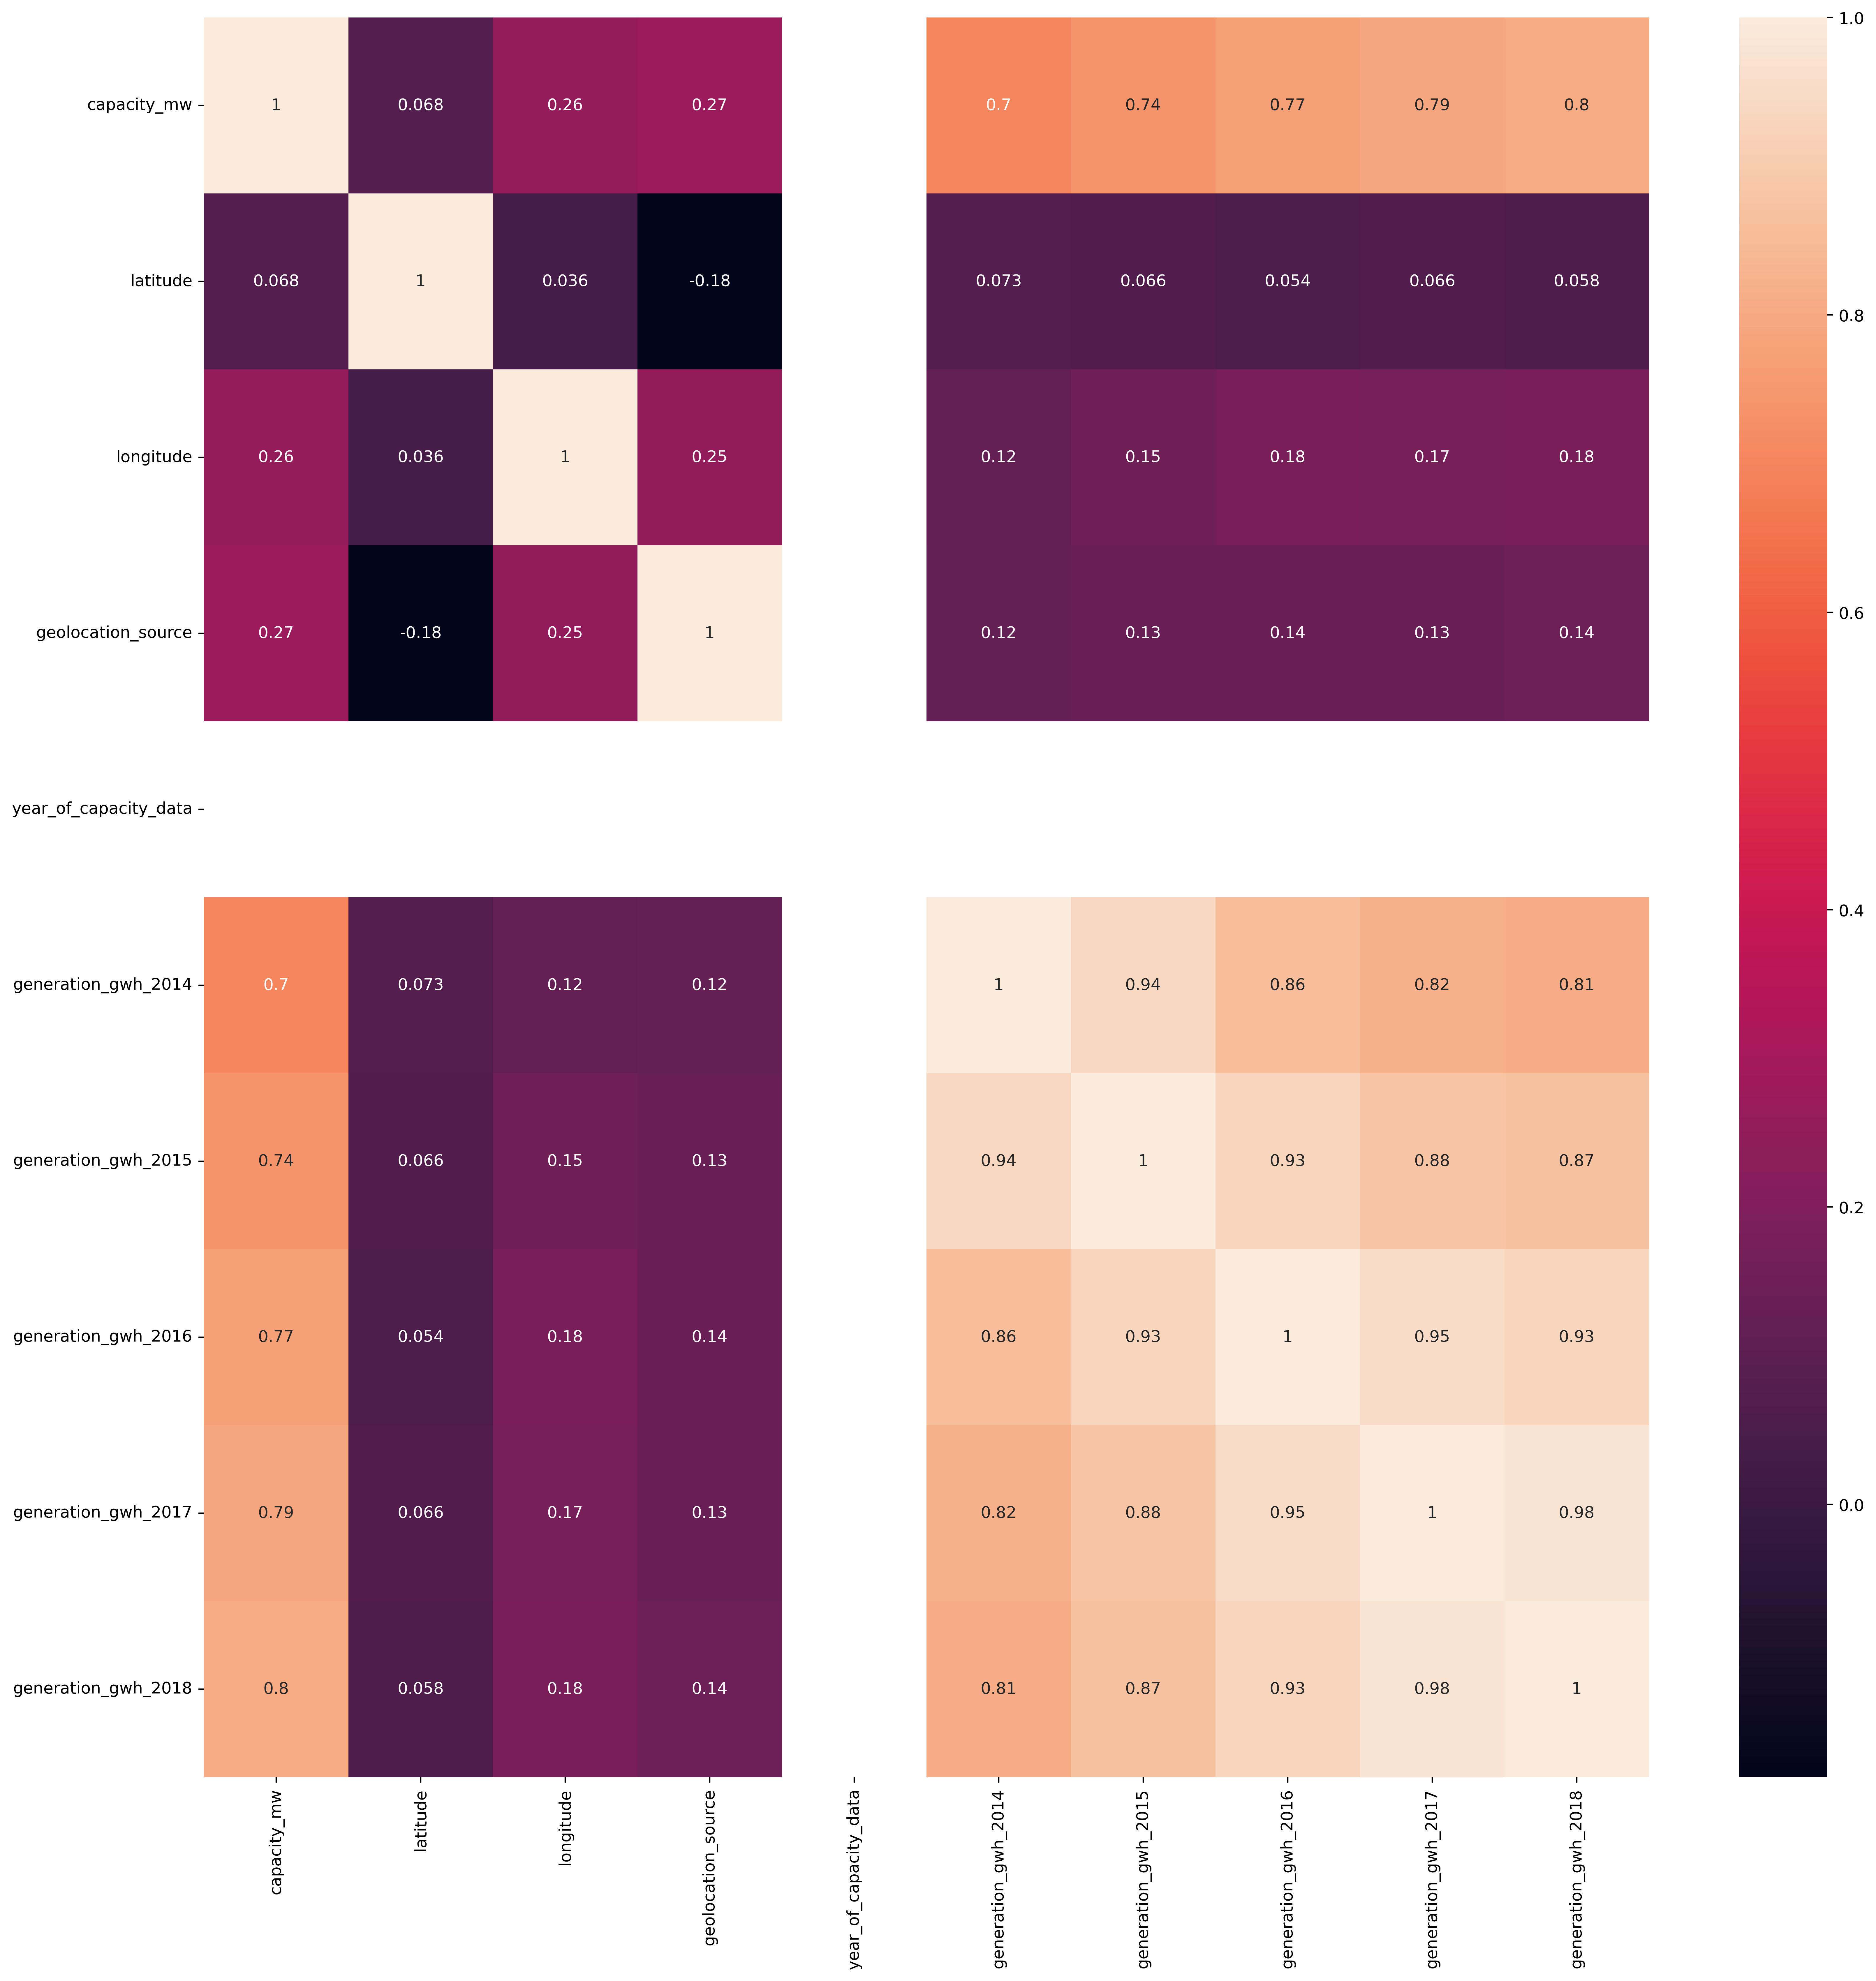

In [31]:
plt.figure(figsize=(20,20), dpi=400)
sns.heatmap(x1.corr(), annot=True)

In [ ]:
 Predicting Primary Fue

In [42]:
#model developemnt libraries
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,roc_curve,roc_auc_score
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso,Ridge,ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [43]:
x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=0.2,random_state=43)

In [44]:
dtc=DecisionTreeClassifier()

In [45]:
from sklearn.tree import DecisionTreeClassifier as dtc

In [50]:
dtc=DecisionTreeClassifier()
rfc=RandomForestClassifier()
lg=LogisticRegression()
knc=KNeighborsClassifier()
sgc=SGDClassifier()

In [51]:
seed=7
#prepare models
models=[]
models.append(('DecisionTreeClassifier',dtc))
models.append(('RandomForestClassifier',rfc))
models.append(('KNeighborsClassifier',knc))
models.append(('SGDClassifier',sgc))
models.append(('LogisticRegression',lg))

In [52]:
for i in range(0,100):
    #evaluate each model in turn
    print('Random State ===============================', i, '===============================')
    x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=0.2,random_state=i)
    Model=[]
    cvs=[]
    score=[]
    rocscore=[]
    for name,model in models:
        print('**************',name,'***********')
        print('\n')
        Model.append(name)
        model.fit(x_train,y_train)
        print(model)
        pred=model.predict(x_test)
        print('\n')
        acc=accuracy_score(y_test,pred)
        print('accuracy score',acc)
        score.append(acc*100)
        kfold=model_selection.KFold(n_splits=10)
        # ---------------------------------------------------------------------------------------------------------

        cv=model_selection.cross_val_score(model,x_train,y_train,cv=10,scoring='accuracy').mean()
        print('Cross-val-score=',cv)
        cvs.append(cv*100)
        print('\n')
        

Random State =============================== 0 ===============================
************** DecisionTreeClassifier ***********


DecisionTreeClassifier()


accuracy score 0.8089887640449438
Cross-val-score= 0.7267605633802816


************** RandomForestClassifier ***********


RandomForestClassifier()


accuracy score 0.8146067415730337
Cross-val-score= 0.7760563380281691


************** KNeighborsClassifier ***********


KNeighborsClassifier()


accuracy score 0.6629213483146067
Cross-val-score= 0.5859154929577465


************** SGDClassifier ***********


SGDClassifier()


accuracy score 0.43258426966292135
Cross-val-score= 0.37464788732394366


************** LogisticRegression ***********


LogisticRegression()


accuracy score 0.5112359550561798
Cross-val-score= 0.44507042253521123


Random State =============================== 1 ===============================
************** DecisionTreeClassifier ***********


DecisionTreeClassifier()


accuracy score 0.797752808988764
Cr

RandomForestClassifier()


accuracy score 0.8202247191011236
Cross-val-score= 0.7774647887323944


************** KNeighborsClassifier ***********


KNeighborsClassifier()


accuracy score 0.6460674157303371
Cross-val-score= 0.5873239436619718


************** SGDClassifier ***********


SGDClassifier()


accuracy score 0.3146067415730337
Cross-val-score= 0.39014084507042257


************** LogisticRegression ***********


LogisticRegression()


accuracy score 0.4550561797752809
Cross-val-score= 0.4619718309859155


Random State =============================== 11 ===============================
************** DecisionTreeClassifier ***********


DecisionTreeClassifier()


accuracy score 0.7415730337078652
Cross-val-score= 0.6985915492957747


************** RandomForestClassifier ***********


RandomForestClassifier()


accuracy score 0.797752808988764
Cross-val-score= 0.7605633802816901


************** KNeighborsClassifier ***********


KNeighborsClassifier()


accuracy score 0.6235

Cross-val-score= 0.3197183098591549


************** LogisticRegression ***********


LogisticRegression()


accuracy score 0.5112359550561798
Cross-val-score= 0.4690140845070423


Random State =============================== 21 ===============================
************** DecisionTreeClassifier ***********


DecisionTreeClassifier()


accuracy score 0.6910112359550562
Cross-val-score= 0.743661971830986


************** RandomForestClassifier ***********


RandomForestClassifier()


accuracy score 0.7528089887640449
Cross-val-score= 0.7915492957746479


************** KNeighborsClassifier ***********


KNeighborsClassifier()


accuracy score 0.5617977528089888
Cross-val-score= 0.6


************** SGDClassifier ***********


SGDClassifier()


accuracy score 0.33707865168539325
Cross-val-score= 0.3352112676056338


************** LogisticRegression ***********


LogisticRegression()


accuracy score 0.4438202247191011
Cross-val-score= 0.4633802816901408


Random State ================

RandomForestClassifier()


accuracy score 0.7752808988764045
Cross-val-score= 0.7802816901408451


************** KNeighborsClassifier ***********


KNeighborsClassifier()


accuracy score 0.6179775280898876
Cross-val-score= 0.6028169014084506


************** SGDClassifier ***********


SGDClassifier()


accuracy score 0.3202247191011236
Cross-val-score= 0.35352112676056335


************** LogisticRegression ***********


LogisticRegression()


accuracy score 0.4887640449438202
Cross-val-score= 0.4929577464788732


Random State =============================== 32 ===============================
************** DecisionTreeClassifier ***********


DecisionTreeClassifier()


accuracy score 0.7303370786516854
Cross-val-score= 0.7436619718309858


************** RandomForestClassifier ***********


RandomForestClassifier()


accuracy score 0.7865168539325843
Cross-val-score= 0.7971830985915493


************** KNeighborsClassifier ***********


KNeighborsClassifier()


accuracy score 0.606

Cross-val-score= 0.3267605633802817


************** LogisticRegression ***********


LogisticRegression()


accuracy score 0.47191011235955055
Cross-val-score= 0.4591549295774648


Random State =============================== 42 ===============================
************** DecisionTreeClassifier ***********


DecisionTreeClassifier()


accuracy score 0.7808988764044944
Cross-val-score= 0.7014084507042253


************** RandomForestClassifier ***********


RandomForestClassifier()


accuracy score 0.797752808988764
Cross-val-score= 0.771830985915493


************** KNeighborsClassifier ***********


KNeighborsClassifier()


accuracy score 0.6404494382022472
Cross-val-score= 0.591549295774648


************** SGDClassifier ***********


SGDClassifier()


accuracy score 0.47752808988764045
Cross-val-score= 0.35352112676056335


************** LogisticRegression ***********


LogisticRegression()


accuracy score 0.43820224719101125
Cross-val-score= 0.4647887323943663


Random State 

Cross-val-score= 0.4619718309859155


Random State =============================== 52 ===============================
************** DecisionTreeClassifier ***********


DecisionTreeClassifier()


accuracy score 0.7247191011235955
Cross-val-score= 0.7253521126760564


************** RandomForestClassifier ***********


RandomForestClassifier()


accuracy score 0.7752808988764045
Cross-val-score= 0.7760563380281691


************** KNeighborsClassifier ***********


KNeighborsClassifier()


accuracy score 0.5730337078651685
Cross-val-score= 0.604225352112676


************** SGDClassifier ***********


SGDClassifier()


accuracy score 0.34269662921348315
Cross-val-score= 0.3563380281690141


************** LogisticRegression ***********


LogisticRegression()


accuracy score 0.46629213483146065
Cross-val-score= 0.4549295774647888


Random State =============================== 53 ===============================
************** DecisionTreeClassifier ***********


DecisionTreeClassifier()

RandomForestClassifier()


accuracy score 0.7471910112359551
Cross-val-score= 0.7830985915492958


************** KNeighborsClassifier ***********


KNeighborsClassifier()


accuracy score 0.6235955056179775
Cross-val-score= 0.5985915492957746


************** SGDClassifier ***********


SGDClassifier()


accuracy score 0.449438202247191
Cross-val-score= 0.3788732394366197


************** LogisticRegression ***********


LogisticRegression()


accuracy score 0.43820224719101125
Cross-val-score= 0.4690140845070423


Random State =============================== 63 ===============================
************** DecisionTreeClassifier ***********


DecisionTreeClassifier()


accuracy score 0.7359550561797753
Cross-val-score= 0.7211267605633802


************** RandomForestClassifier ***********


RandomForestClassifier()


accuracy score 0.8089887640449438
Cross-val-score= 0.771830985915493


************** KNeighborsClassifier ***********


KNeighborsClassifier()


accuracy score 0.61235

Cross-val-score= 0.3464788732394366


************** LogisticRegression ***********


LogisticRegression()


accuracy score 0.38764044943820225
Cross-val-score= 0.476056338028169


Random State =============================== 73 ===============================
************** DecisionTreeClassifier ***********


DecisionTreeClassifier()


accuracy score 0.7359550561797753
Cross-val-score= 0.7211267605633802


************** RandomForestClassifier ***********


RandomForestClassifier()


accuracy score 0.8202247191011236
Cross-val-score= 0.7647887323943662


************** KNeighborsClassifier ***********


KNeighborsClassifier()


accuracy score 0.6348314606741573
Cross-val-score= 0.5901408450704225


************** SGDClassifier ***********


SGDClassifier()


accuracy score 0.24157303370786518
Cross-val-score= 0.3915492957746479


************** LogisticRegression ***********


LogisticRegression()


accuracy score 0.4438202247191011
Cross-val-score= 0.4605633802816901


Random State 

Cross-val-score= 0.4450704225352113


Random State =============================== 83 ===============================
************** DecisionTreeClassifier ***********


DecisionTreeClassifier()


accuracy score 0.7696629213483146
Cross-val-score= 0.7211267605633802


************** RandomForestClassifier ***********


RandomForestClassifier()


accuracy score 0.7921348314606742
Cross-val-score= 0.7774647887323944


************** KNeighborsClassifier ***********


KNeighborsClassifier()


accuracy score 0.5955056179775281
Cross-val-score= 0.5957746478873238


************** SGDClassifier ***********


SGDClassifier()


accuracy score 0.2808988764044944
Cross-val-score= 0.3788732394366197


************** LogisticRegression ***********


LogisticRegression()


accuracy score 0.46629213483146065
Cross-val-score= 0.4577464788732394


Random State =============================== 84 ===============================
************** DecisionTreeClassifier ***********


DecisionTreeClassifier()

RandomForestClassifier()


accuracy score 0.7584269662921348
Cross-val-score= 0.7774647887323944


************** KNeighborsClassifier ***********


KNeighborsClassifier()


accuracy score 0.5730337078651685
Cross-val-score= 0.6042253521126761


************** SGDClassifier ***********


SGDClassifier()


accuracy score 0.30337078651685395
Cross-val-score= 0.3380281690140845


************** LogisticRegression ***********


LogisticRegression()


accuracy score 0.48314606741573035
Cross-val-score= 0.4676056338028169


Random State =============================== 94 ===============================
************** DecisionTreeClassifier ***********


DecisionTreeClassifier()


accuracy score 0.7584269662921348
Cross-val-score= 0.723943661971831


************** RandomForestClassifier ***********


RandomForestClassifier()


accuracy score 0.8033707865168539
Cross-val-score= 0.767605633802817


************** KNeighborsClassifier ***********


KNeighborsClassifier()


accuracy score 0.6011

Parameter Tuning

In [57]:
x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=0.2,random_state=1)

In [58]:
clf_gb=GridSearchCV(estimator=GradientBoostingClassifier(),cv=10,param_grid=dict({'n_estimators':[500]}))
clf_gb.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=GradientBoostingClassifier(),
             param_grid={'n_estimators': [500]})

In [59]:
clf_gb.best_score_

0.7577464788732395

In [60]:
clf_gb.best_params_

{'n_estimators': 500}

In [61]:
clf_gb_df = pd.DataFrame(clf_gb.cv_results_)
clf_gb_df

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       5.573793      0.264565         0.010573        0.013455   

  param_n_estimators                 params  split0_test_score  \
0                500  {'n_estimators': 500}           0.802817   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
0           0.704225           0.760563           0.732394           0.830986   

   split5_test_score  split6_test_score  split7_test_score  split8_test_score  \
0            0.71831           0.746479           0.732394           0.830986   

   split9_test_score  mean_test_score  std_test_score  rank_test_score  
0            0.71831         0.757746        0.044894                1

In [62]:
pred=clf_gb.predict(x_test)
accuracy_score(pred,y_test)

0.8314606741573034

In [63]:
# Save File
import pickle
file = 'gpp_pred_fuel_type'
#save file
save = pickle.dump(clf_gb,open(file,'wb'))

 # 1.Predicting capacity_mw

In [64]:
y2 = df2['capacity_mw']
y2

0        2.5000
1       98.0000
2       39.2000
3      135.0000
4      938.0375
5      250.0000
6       60.0000
7      192.0000
8      290.0000
9      210.0000
10     938.0375
11     134.0000
12     938.0375
13      16.9500
14       9.0000
15     938.0375
16     419.3300
17     600.0000
18     938.0375
19      10.0000
20      17.0000
21      24.0000
22     652.0000
23     600.0000
24      46.0000
26       1.0000
27      16.5000
28      50.0000
29     113.6000
30      19.8000
31      13.2000
32       5.0000
33       5.0000
34       5.0000
35       5.0000
36       5.0000
37       5.0000
38       5.0000
39     705.0000
40      28.0000
41     450.0000
42     450.0000
43     180.0000
44     938.0375
45     600.0000
46     510.0000
47      67.5000
48      10.0000
49     300.0000
50     335.0000
51      12.0000
52     315.0000
53      30.0000
54      60.0000
55      20.0000
56      20.0000
57     938.0375
58      42.0000
59     720.0000
60      90.0000
61     938.0375
62      90.0000
63     2

In [65]:
x2 = df2.drop('capacity_mw', axis=1)
x2

latitude  longitude  primary_fuel  commissioning_year  \
0     28.1839    73.2407             6              2011.0   
1     24.7663    74.6090             1              2001.0   
2     21.9038    69.3732             7              2001.0   
3     23.8712    91.3602             2              2004.0   
4     21.9603    82.4091             1              2015.0   
5     23.7689    68.6447             1              2005.0   
6     10.4547    77.0078             3              1970.0   
7     32.2258    77.2070             3              2010.0   
8     16.3300    75.8863             3              2004.0   
9     23.1642    81.6373             1              2008.0   
10    21.0782    77.9009             1              2014.0   
11    31.2717    76.4938             3              1985.0   
12    24.2007    82.8000             1              2011.0   
13    31.2412    77.8769             3              1986.0   
14    21.7800    76.7195             3              1987.0   
15    24.2010    82.7891             1              2000.0   
16    25.1797    76.3188             2              1989.0   
17    23.0666    81.7841             1              2001.0   
18    23.0655    81.7865             1              2015.0   
19    18.0845    76.1851             0              2001.0   
20    19.5867    74.7061             0              2001.0   
21    16.7708    74.9191             0              2001.0   
22    26.6282    79.5286             2              1989.0   
23    21.7438    83.2741             1              2017.0   
24    19.7881    79.1518             1              2001.0   
26    28.3615    74.2402             6              2001.0   
27    14.5751    76.3926             7              2001.0   
28    14.9455    77.6870             6              2001.0   
29    18.8580    73.6396             7              2001.0   
30    10.7245    77.1893             7              2001.0   
31    14.4791    76.3482             7              2001.0   
32    27.3473    71.6917             6              2001.0   
33    27.3600    71.6918             6              2001.0   
34    27.3632    71.6918             6              2001.0   
35    27.3661    71.6916             6              2001.0   
36    27.3537    71.6917             6              2001.0   
37    27.3504    71.6918             6              2001.0   
38    27.3566    71.6917             6              2001.0   
39    28.5060    77.3066             1              1977.0   
40    16.2804    75.2250             0              2001.0   
41    33.1815    75.3155             3              2008.0   
42    21.7800    76.7195             3              2015.0   
43    32.8063    76.1418             3              1980.0   
44    23.8285    87.4513             1              2003.0   
45    21.7800    76.7195             1              2015.0   
46    18.1396    82.1221             3              1984.0   
47    19.8601    79.3421             1              2001.0   
48    24.6929    74.6890             1              2001.0   
49    22.3421    82.4305             1              2015.0   
50    22.9956    88.4042             1              1976.0   
51    32.1686    76.4695             3              1996.0   
52    24.1917    81.2875             3              1991.0   
53    24.1917    81.2875             3              2002.0   
54    24.1917    81.2875             3              2001.0   
55    24.2230    81.2747             3              2006.0   
56    23.6026    74.2562             1              2001.0   
57    21.9114    83.1889             1              2014.0   
58    23.8070    91.5650             2              2006.0   
59    25.3999    86.0218             1              2007.0   
60    22.9417    79.9250             3              1988.0   
61    25.4865    85.7452             1              2014.0   
62    28.4723    79.8066             1              2011.0   
63    27.8453    73.2000             1              2010.0   
64    13.1021    80.2682             

In [66]:
calc_vif(x2)

variables    VIF FACTOR
0                latitude      1.066361
1               longitude      1.173680
2            primary_fuel      1.601748
3      commissioning_year      1.091559
4      geolocation_source      1.455376
5   year_of_capacity_data  25272.513672
6     generation_gwh_2014      8.571639
7     generation_gwh_2015     17.434224
8     generation_gwh_2016     20.327359
9     generation_gwh_2017     29.947831
10    generation_gwh_2018     20.794025

In [67]:
x2.drop('commissioning_year', axis=1, inplace=True)
calc_vif(x2)

variables  VIF FACTOR
0               latitude    1.062744
1              longitude    1.173552
2           primary_fuel    1.595594
3     geolocation_source    1.437131
4  year_of_capacity_data  331.815024
5    generation_gwh_2014    8.470618
6    generation_gwh_2015   17.431955
7    generation_gwh_2016   20.312369
8    generation_gwh_2017   29.930913
9    generation_gwh_2018   20.758762

In [108]:
#Define a function to try different train test folds
def model_select(model):
    max_score=0
    max_state=0
    for i in range(0,200):
        
        # Splitting the data Set
        X_train, X_test, y_train, y_test = train_test_split(x2,y2, test_size=0.33, random_state=i, shuffle=True)
        
        # Added for Scaling
        sc=StandardScaler()
        X_train=sc.fit_transform(X_train)
        X_test=sc.fit_transform(X_test)
        
        # Model Preparation
        md=model()
        md.fit(X_train,y_train)
        
        # Prediction and Testing Model
        predict=md.predict(X_test)
        

        
        r2score=r2_score(y_test,predict)
        rmse = mean_squared_error(y_test, predict, squared=False)
        # cv_score = (cross_val_score(md, x, y, cv=2).mean())*100
        
        
        if r2score>max_score:
            max_score=r2score
            max_state=i
            
            
    # ----------------------------------------------------------
    plt.figure(figsize=(8,6))
    plt.scatter(x=y_test, y=predict, color='g')
    plt.plot(y_test,y_test,color='b')
    plt.xlabel('Actual', fontsize=14)
    plt.ylabel('Predicted', fontsize=14)
    plt.title(md, fontsize=18)
    plt.show()
    
    
    # -----------------------------------------------------------        
    print(f'----------------------------{model}----------------------------')        
    print("1. Maximum score of {} 2. Random_state {} 3. RMSE = {}".format(max_score,max_state, rmse))
    print("MAE",mean_absolute_error(y_test,predict))
    print("MSE",mean_squared_error(y_test,predict))

In [102]:
#model developemnt libraries
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,roc_curve,roc_auc_score
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso,Ridge,ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

------------------------------------"" Linear Regression""------------------------------------ 


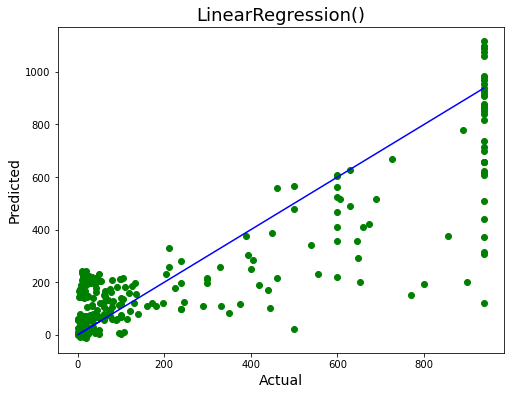

----------------------------<class 'sklearn.linear_model._base.LinearRegression'>----------------------------
1. Maximum score of 0.7608423787867971 2. Random_state 61 3. RMSE = 174.14439204998993
MAE 119.31661680827172
MSE 30326.2692824606
------------------------------------""Lasso""------------------------------------


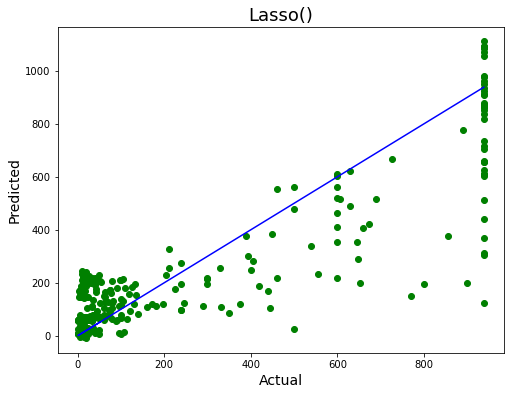

----------------------------<class 'sklearn.linear_model._coordinate_descent.Lasso'>----------------------------
1. Maximum score of 0.76366146485414 2. Random_state 61 3. RMSE = 174.21672405514812
MAE 119.38732571906607
MSE 30351.466940507627
------------------------------------""Ridge""------------------------------------ 


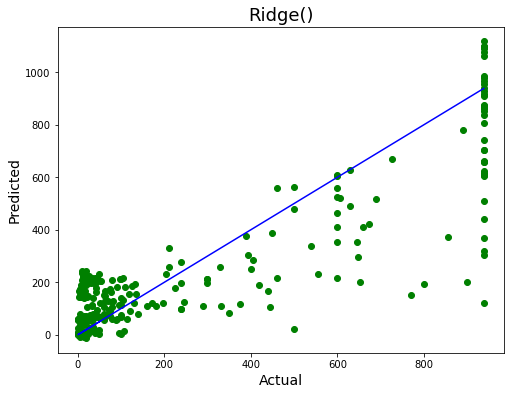

----------------------------<class 'sklearn.linear_model._ridge.Ridge'>----------------------------
1. Maximum score of 0.7612069187291806 2. Random_state 61 3. RMSE = 174.27058476103483
MAE 119.43546920144577
MSE 30370.236712953025
------------------------------------""ElasticNet""------------------------------------ 


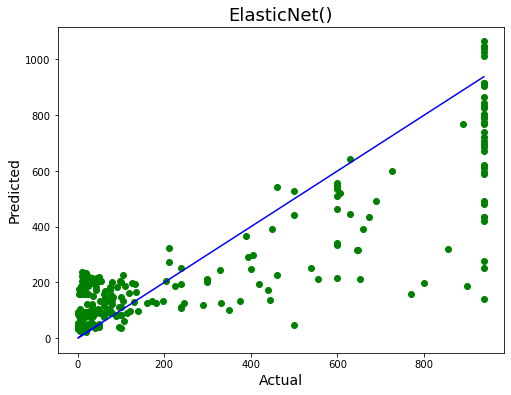

----------------------------<class 'sklearn.linear_model._coordinate_descent.ElasticNet'>----------------------------
1. Maximum score of 0.7462961340604031 2. Random_state 61 3. RMSE = 182.75761630987043
MAE 131.2950548246715
MSE 33400.34631926582
------------------------------------""SVR""------------------------------------


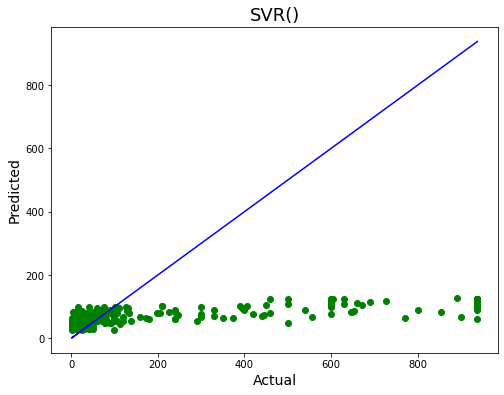

----------------------------<class 'sklearn.svm._classes.SVR'>----------------------------
1. Maximum score of 0 2. Random_state 0 3. RMSE = 360.212253583987
MAE 211.354547356463
MSE 129752.86763205455
------------------------------------""DecisionTreeRegressor""------------------------------------


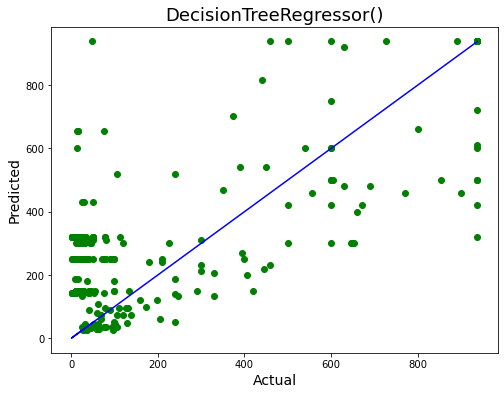

----------------------------<class 'sklearn.tree._classes.DecisionTreeRegressor'>----------------------------
1. Maximum score of 0.8448509917013055 2. Random_state 89 3. RMSE = 224.9387784344649
MAE 173.48237925170073
MSE 50597.45404358929
------------------------------------""RandomForestRegressor""------------------------------------


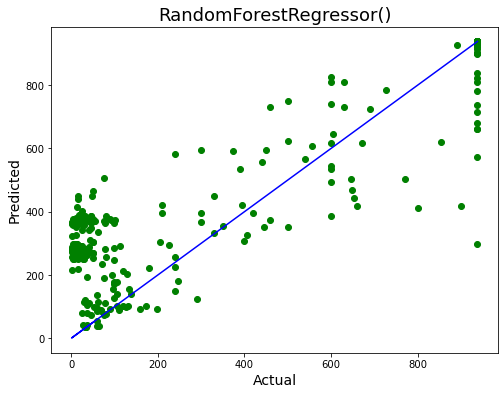

----------------------------<class 'sklearn.ensemble._forest.RandomForestRegressor'>----------------------------
1. Maximum score of 0.8517011250896741 2. Random_state 38 3. RMSE = 238.61946835939762
MAE 196.68566153061224
MSE 56939.250680121564
------------------------------------""KNeighborsRegressor""------------------------------------ 


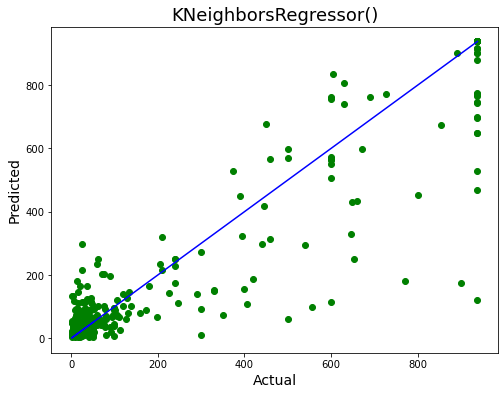

----------------------------<class 'sklearn.neighbors._regression.KNeighborsRegressor'>----------------------------
1. Maximum score of 0.898269526603544 2. Random_state 59 3. RMSE = 131.20119211637078
MAE 70.53549013605442
MSE 17213.752812756833
------------------------------------""SGDRegressor""------------------------------------


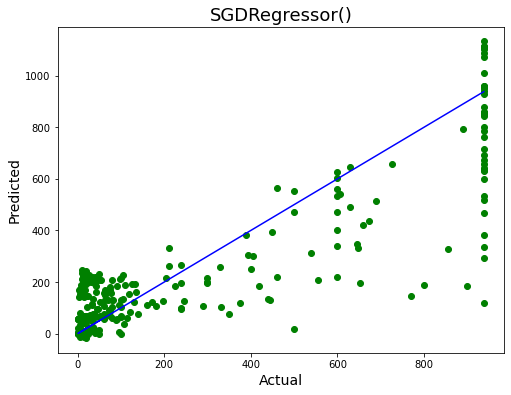

----------------------------<class 'sklearn.linear_model._stochastic_gradient.SGDRegressor'>----------------------------
1. Maximum score of 0.7615498750288887 2. Random_state 61 3. RMSE = 176.0205665261022
MAE 120.60329310140034
MSE 30983.239840169965
------------------------------------""GradientBoostingRegressor""------------------------------------


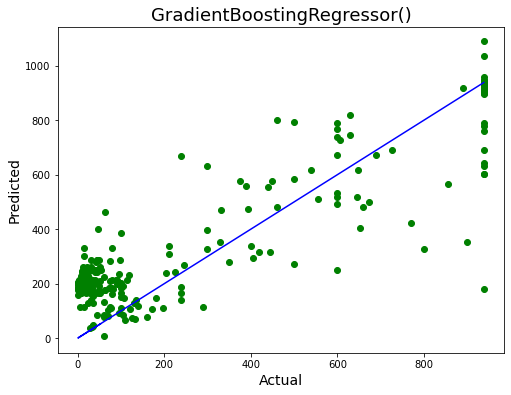

----------------------------<class 'sklearn.ensemble._gb.GradientBoostingRegressor'>----------------------------
1. Maximum score of 0.8827194815697691 2. Random_state 38 3. RMSE = 175.6430387034293
MAE 146.04159143095637
MSE 30850.47704497437
------------------------------------""AdaBoostRegressor""------------------------------------


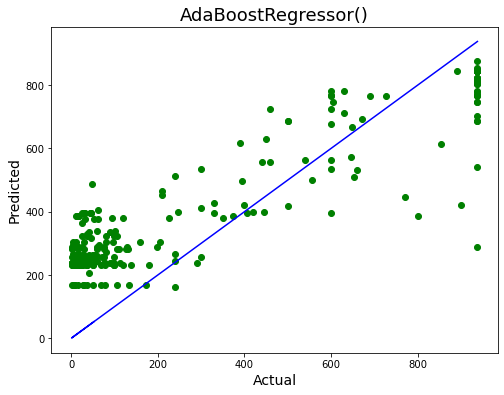

----------------------------<class 'sklearn.ensemble._weight_boosting.AdaBoostRegressor'>----------------------------
1. Maximum score of 0.8248309339502429 2. Random_state 175 3. RMSE = 213.5902695672
MAE 194.74265546315644
MSE 45620.80325378917
------------------------------------""ExtraTreesRegressor""------------------------------------


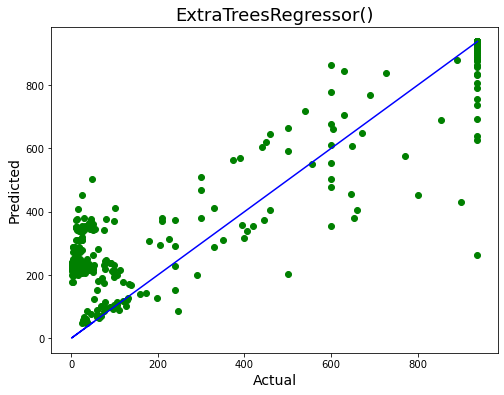

----------------------------<class 'sklearn.ensemble._forest.ExtraTreesRegressor'>----------------------------
1. Maximum score of 0.885479603311047 2. Random_state 2 3. RMSE = 203.32681786050065
MAE 168.05828210111312
MSE 41341.79486127721


In [109]:
print(f'------------------------------------"\033[1m" Linear Regression"\033[0m"------------------------------------ ')
model_select(LinearRegression)
print(f'------------------------------------"\033[1m"Lasso"\033[0m"------------------------------------')
model_select(Lasso)
print(f'------------------------------------"\033[1m"Ridge"\033[0m"------------------------------------ ')
model_select(Ridge)
print(f'------------------------------------"\033[1m"ElasticNet"\033[0m"------------------------------------ ')
model_select(ElasticNet)
print(f'------------------------------------"\033[1m"SVR"\033[0m"------------------------------------')
model_select(SVR)
print(f'------------------------------------"\033[1m"DecisionTreeRegressor"\033[0m"------------------------------------')
model_select(DecisionTreeRegressor)
print(f'------------------------------------"\033[1m"RandomForestRegressor"\033[0m"------------------------------------')
model_select(RandomForestRegressor)
print(f'------------------------------------"\033[1m"KNeighborsRegressor"\033[0m"------------------------------------ ')
model_select(KNeighborsRegressor)
print(f'------------------------------------"\033[1m"SGDRegressor"\033[0m"------------------------------------')
model_select(SGDRegressor)
print(f'------------------------------------"\033[1m"GradientBoostingRegressor"\033[0m"------------------------------------')
model_select(GradientBoostingRegressor)
print(f'------------------------------------"\033[1m"AdaBoostRegressor"\033[0m"------------------------------------')
model_select(AdaBoostRegressor)
print(f'------------------------------------"\033[1m"ExtraTreesRegressor"\033[0m"------------------------------------')
model_select(ExtraTreesRegressor)

# Parameter Tuning

In [136]:
X_train, X_test, y_train, y_test = train_test_split(x2, y2, test_size=0.33, random_state=38)

In [141]:
GBR = GradientBoostingRegressor()

In [142]:
parameters = {'learning_rate': [0.01,0.02,0.03,0.04], 'subsample' : [0.9, 0.5, 0.2, 0.1], 'n_estimators' : [100,500,1000, 1500],'max_depth': [4,6,8,10]}

In [143]:
grid_GBR = GridSearchCV(estimator=GBR, param_grid = parameters, cv = 2, n_jobs=-1)
grid_GBR.fit(X_train, y_train)

GridSearchCV(cv=2, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.02, 0.03, 0.04],
                         'max_depth': [4, 6, 8, 10],
                         'n_estimators': [100, 500, 1000, 1500],
                         'subsample': [0.9, 0.5, 0.2, 0.1]})

In [144]:
print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n",grid_GBR.best_estimator_)
print("\n The best score across ALL searched params:\n",grid_GBR.best_score_)
print("\n The best parameters across ALL searched params:\n",grid_GBR.best_params_)

 Results from Grid Search 

 The best estimator across ALL searched params:
 GradientBoostingRegressor(learning_rate=0.04, max_depth=6, subsample=0.2)

 The best score across ALL searched params:
 0.8149653304560753

 The best parameters across ALL searched params:
 {'learning_rate': 0.04, 'max_depth': 6, 'n_estimators': 100, 'subsample': 0.2}


In [145]:
# Save File
import pickle
file = 'gpp_pred_capacity_mw'
#save file
save = pickle.dump(grid_GBR,open(file,'wb'))

In [146]:
# To Read and Process Data
import pandas as pd
import numpy as np


# For data Visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Getting over warning messages
import warnings
warnings.filterwarnings('ignore')

# For Encoding Categorical Data
from sklearn.preprocessing import LabelEncoder

# for scaling
from sklearn.preprocessing import StandardScaler  

pd.pandas.set_option('display.max_columns',None)  # To display, all columns
pd.pandas.set_option('display.max_rows',None)  # To display, all columns
# For handling outliers
# importing required libraries
from scipy import stats
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import zscore
# For machine learning and finding 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score